In [2]:
from pathlib import Path

import polars as pl

from trade_analysis.ingress import load_trade_csv_v2
from trade_analysis.processing import compute_shares, compute_hhi
from trade_analysis.charts.pie import plot_pie
from trade_analysis.charts.bar import plot_bar
from trade_analysis.charts.line import plot_share_over_time
from trade_analysis.charts.hhi import plot_hhi_over_time

In [3]:
df = load_trade_csv_v2(Path("data/hs85.csv"))
result = compute_shares(df)
hhi = compute_hhi(result)
print(result)
print(hhi)

shape: (64_907, 12)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ partner_c ┆ partner_n ┆ product_c ┆ product_n ┆ … ┆ yoy_chang ┆ ma_3y     ┆ is_signif ┆ was_sign │
│ ode       ┆ ame       ┆ ode       ┆ ame       ┆   ┆ e_percent ┆ ---       ┆ icant     ┆ ificant  │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ f64       ┆ ---       ┆ ---      │
│ str       ┆ str       ┆ i64       ┆ str       ┆   ┆ f64       ┆           ┆ bool      ┆ bool     │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ AD        ┆ Andorra   ┆ 85        ┆ ELECTRICA ┆ … ┆ null      ┆ null      ┆ false     ┆ null     │
│           ┆           ┆           ┆ L         ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆           ┆ MACHINERY ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆           ┆ AND       ┆   ┆           ┆      

In [4]:
product_codes = result["product_code"].unique().sort()
analysis_years = result["time_period"].unique().sort()

print("Product codes:", product_codes.to_list())
print("Years:", analysis_years.to_list())

Product codes: [85, 8501, 8502, 8503, 8504, 8505, 8506, 8507, 8508, 8509, 8510, 8511, 8512, 8513, 8514, 8515, 8516, 8517, 8518, 8519, 8521, 8522, 8523, 8524, 8525, 8526, 8527, 8528, 8529, 8530, 8531, 8532, 8533, 8534, 8535, 8536, 8537, 8538, 8539, 8540, 8541, 8542, 8543, 8544, 8545, 8546, 8547, 8548, 8549, 854231]
Years: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


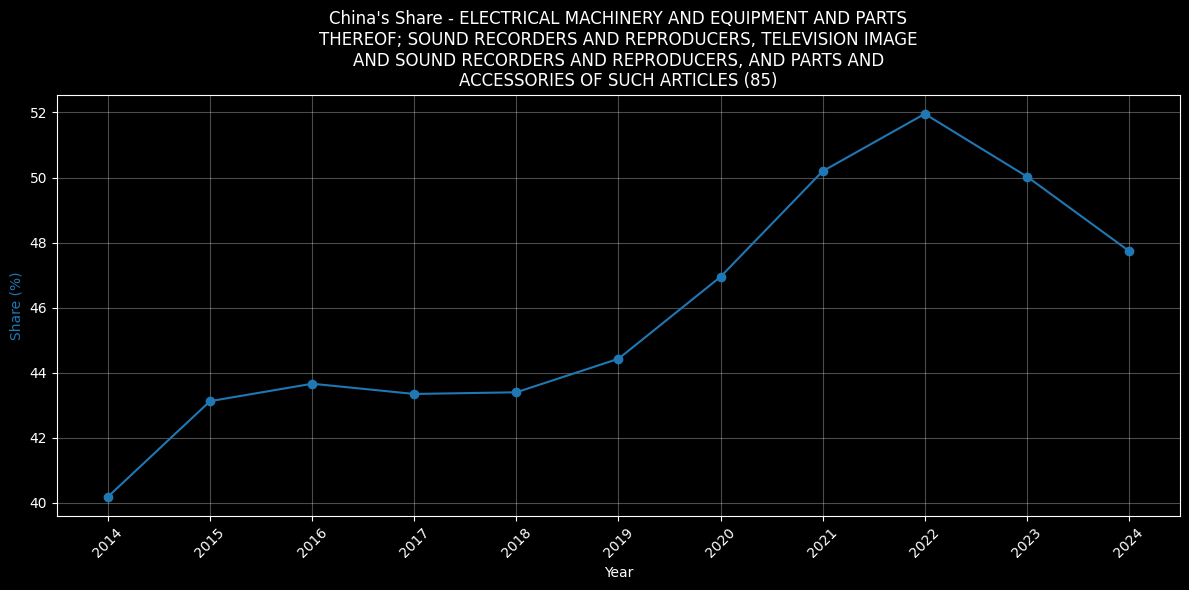

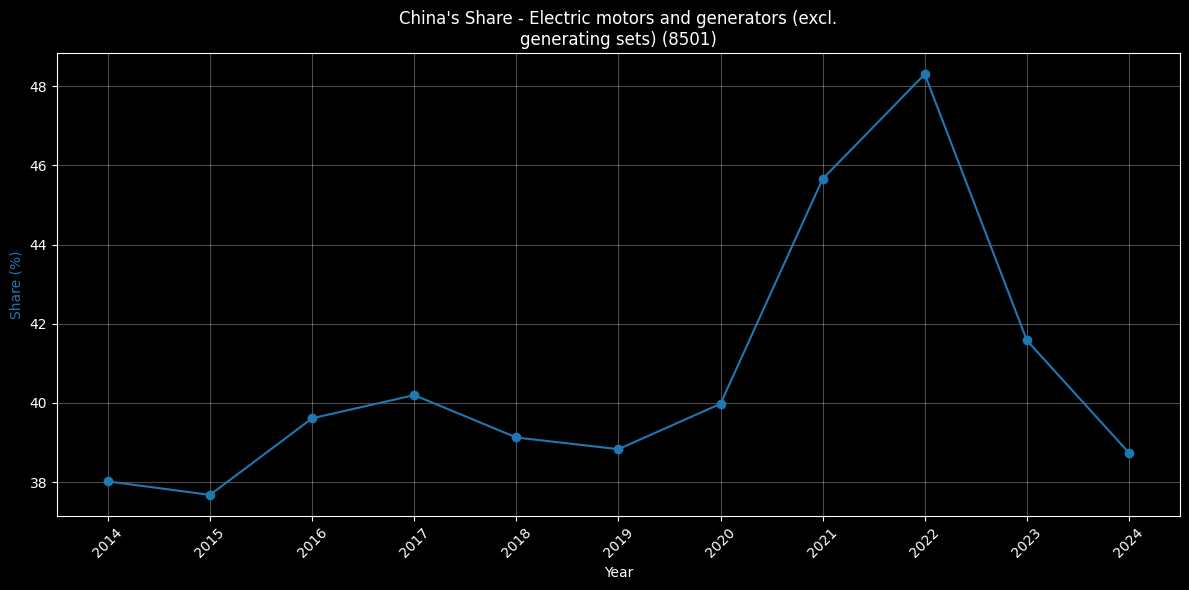

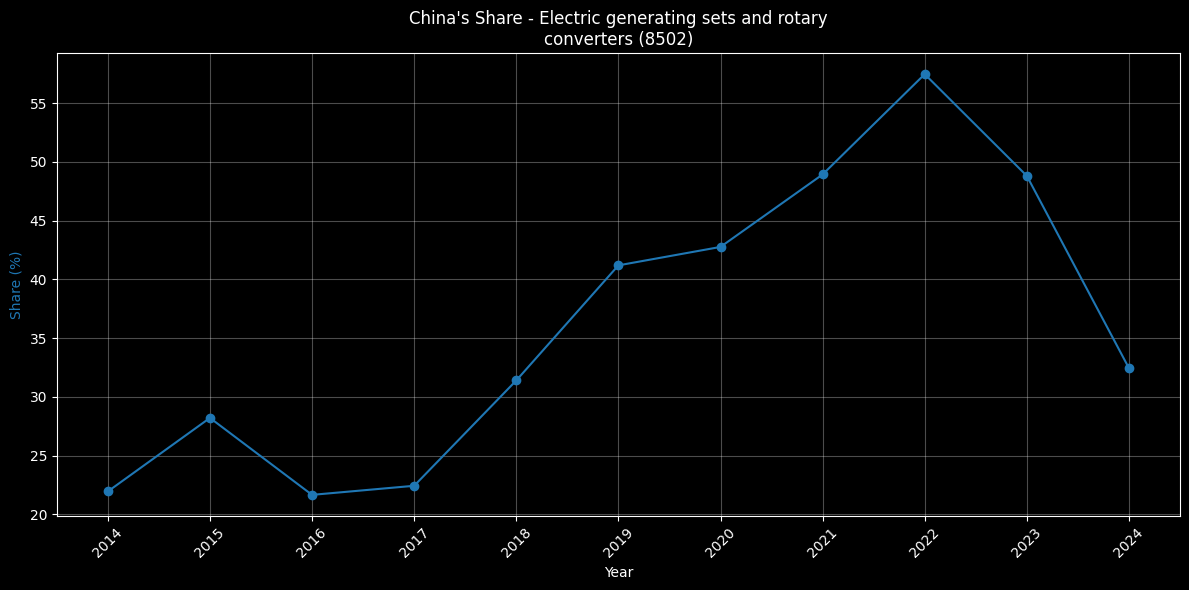

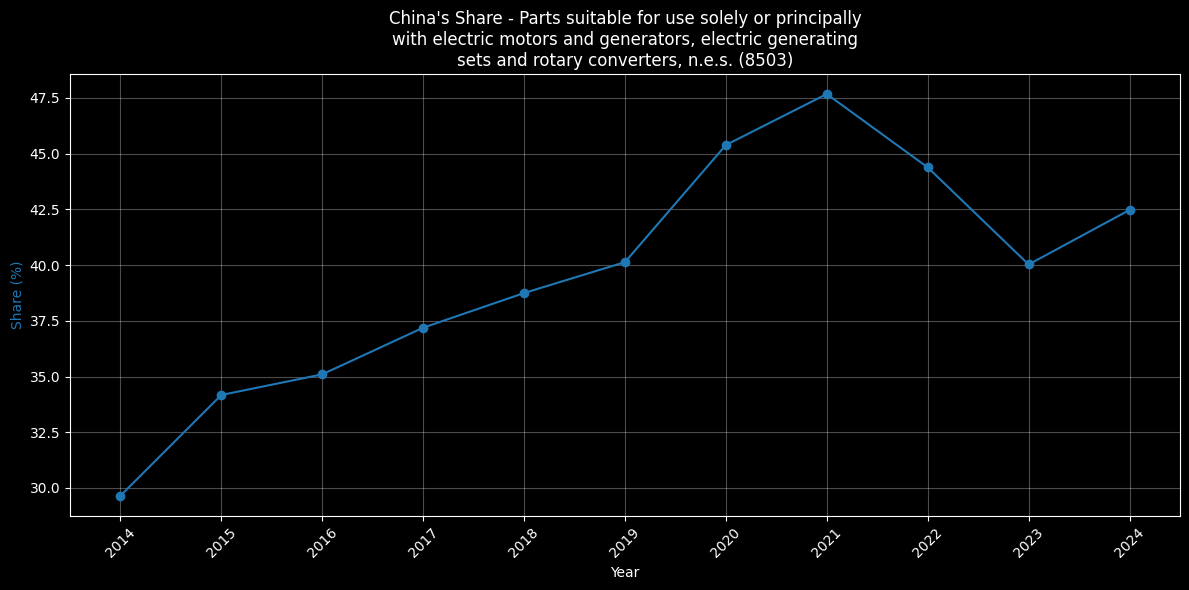

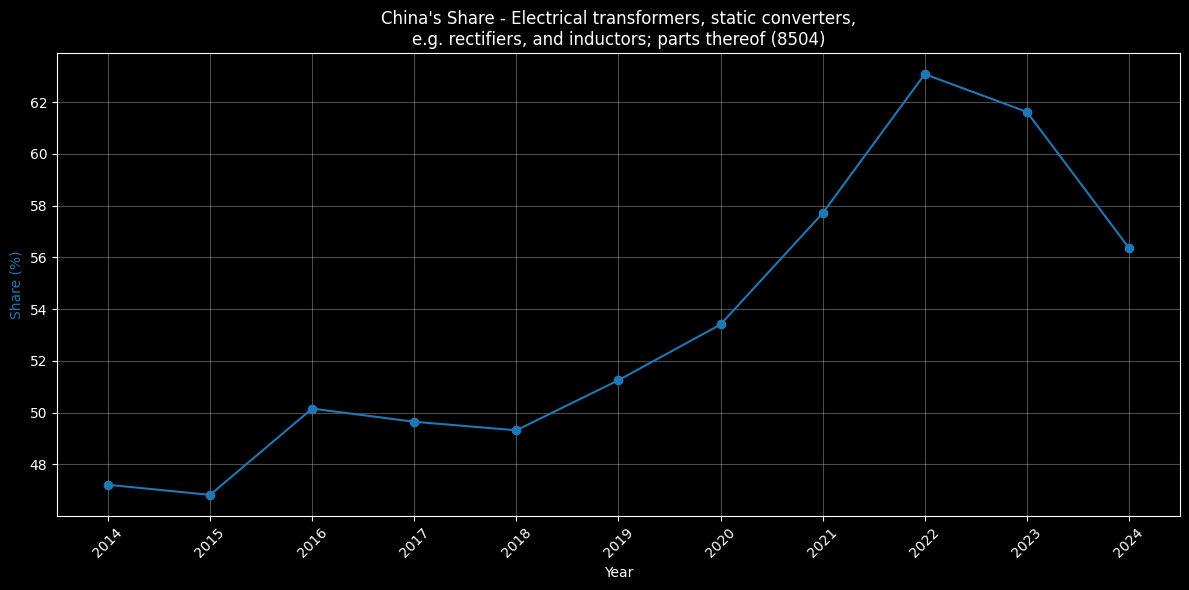

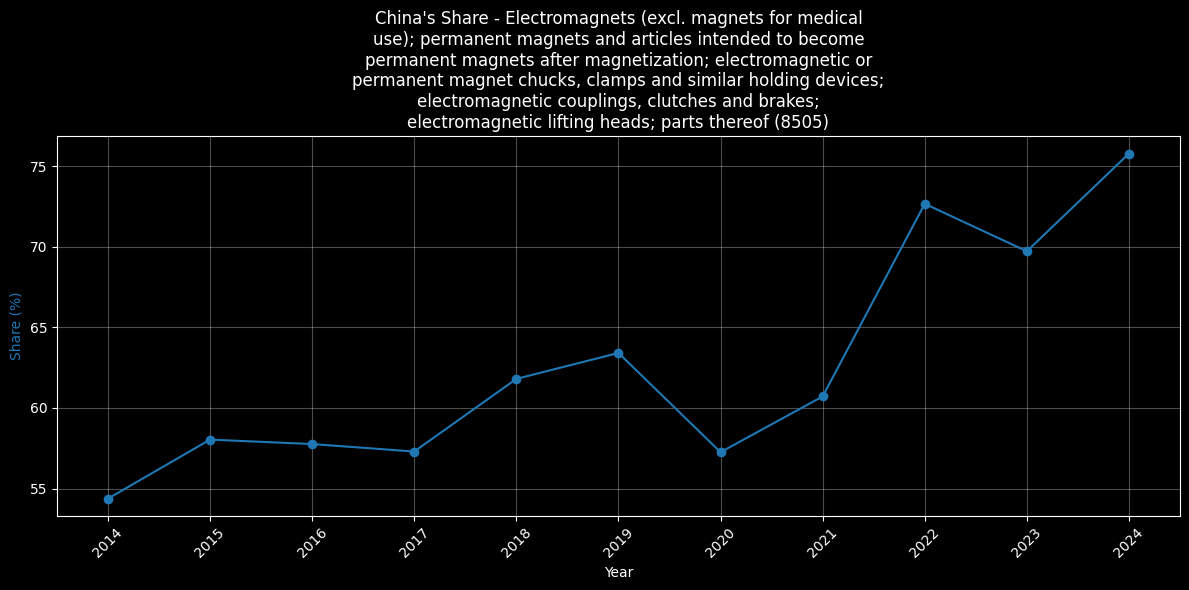

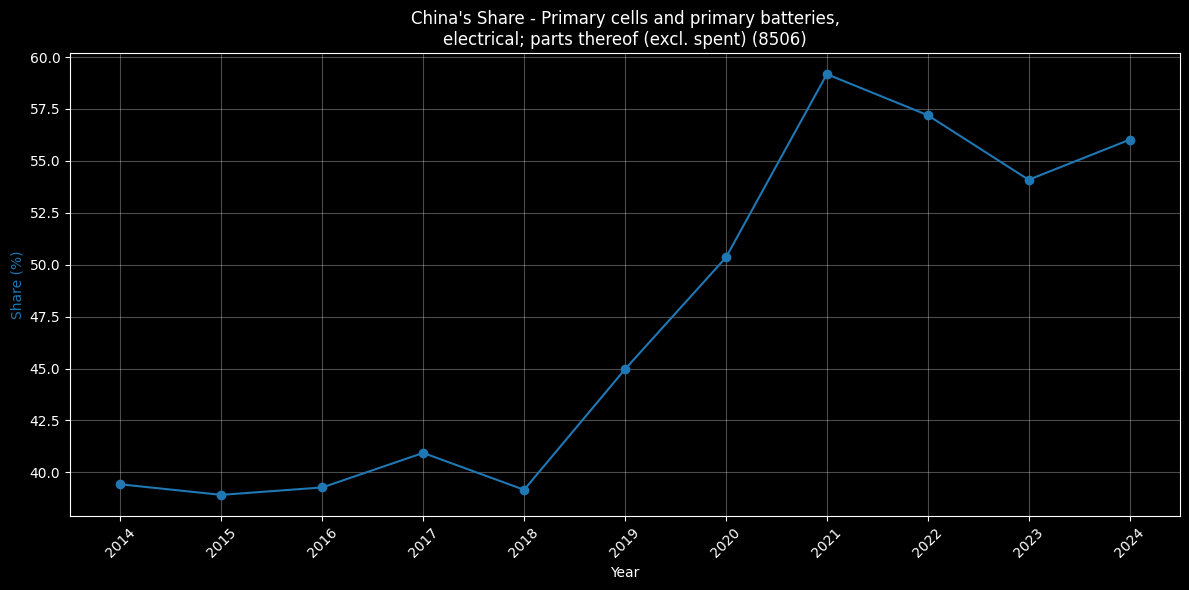

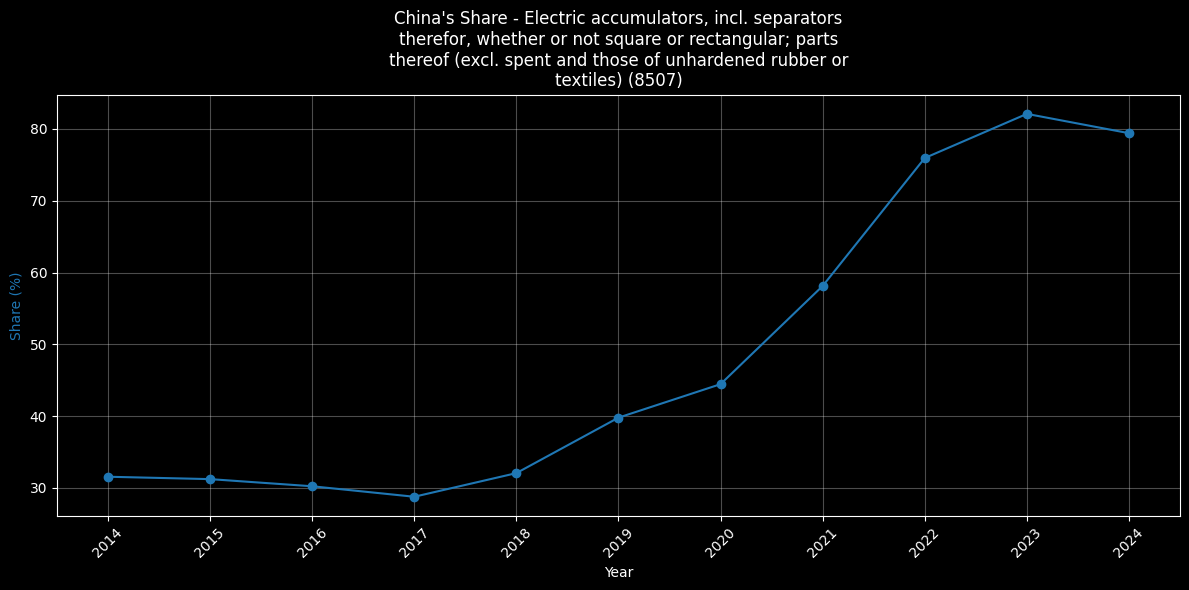

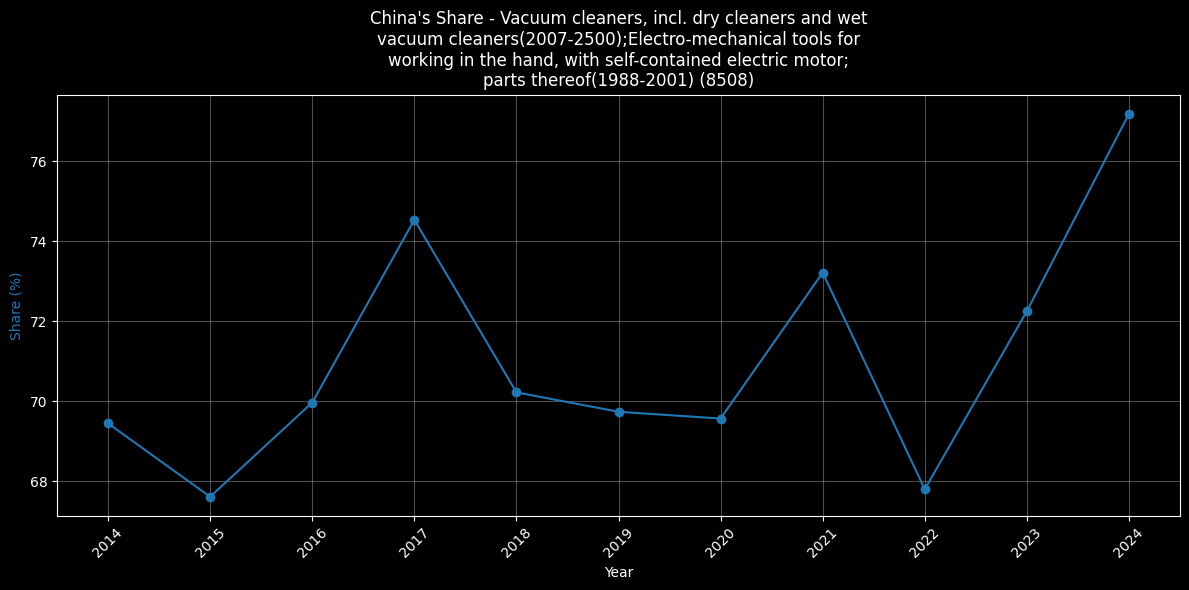

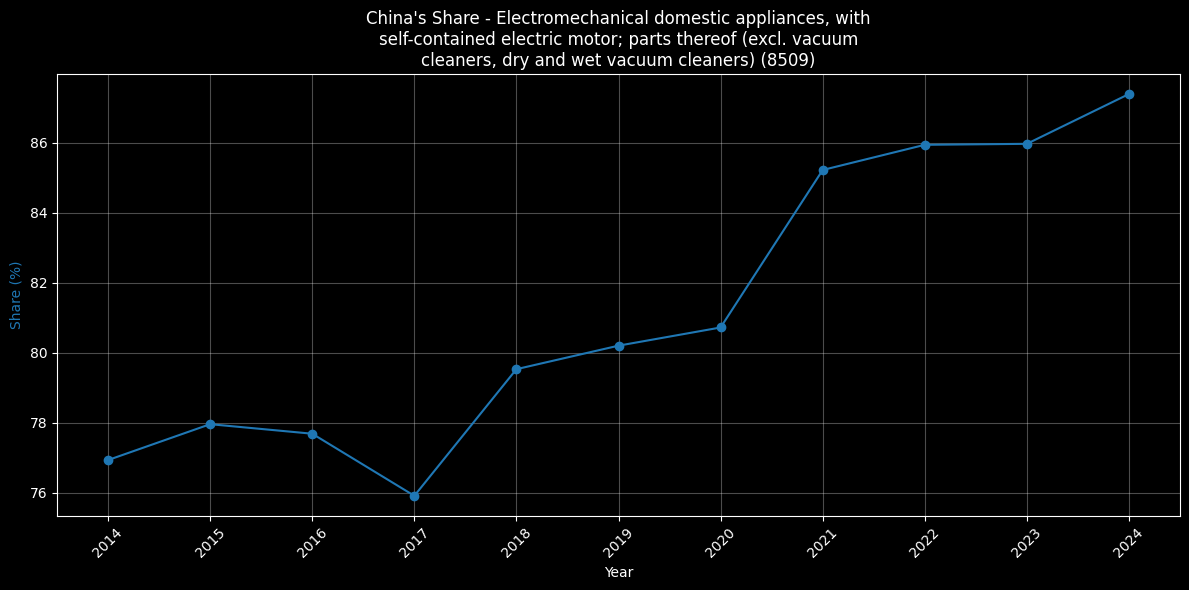

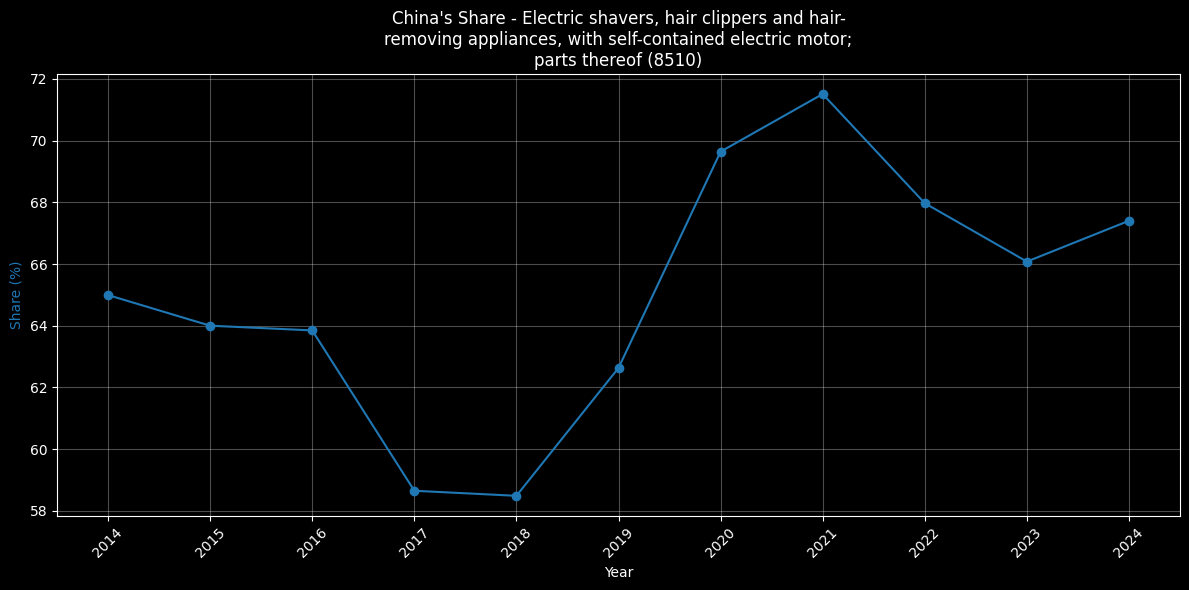

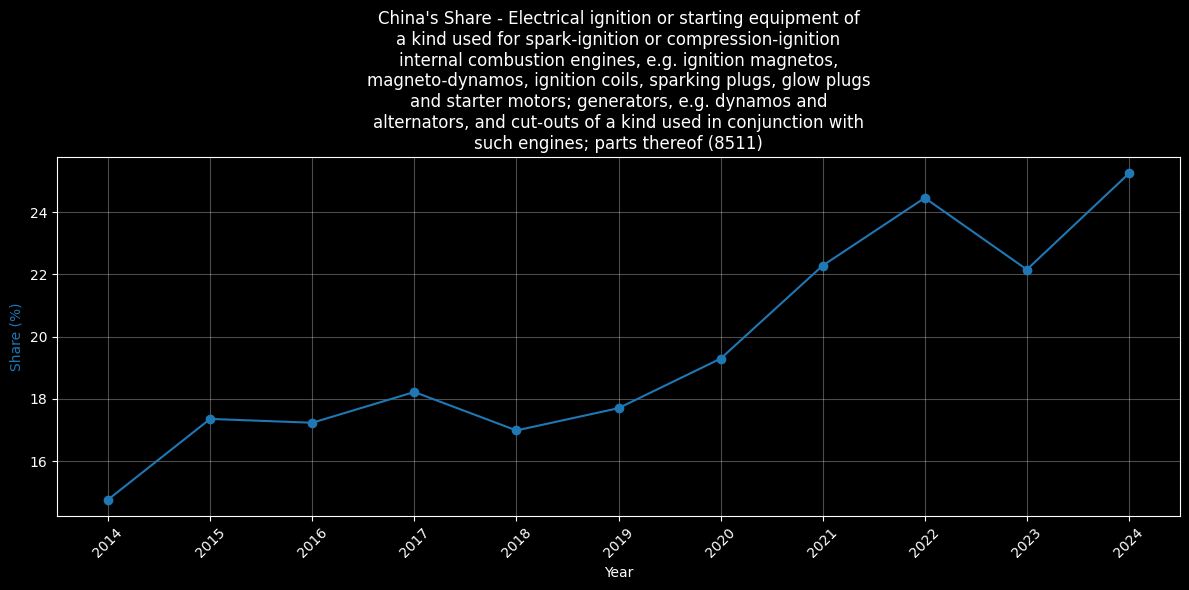

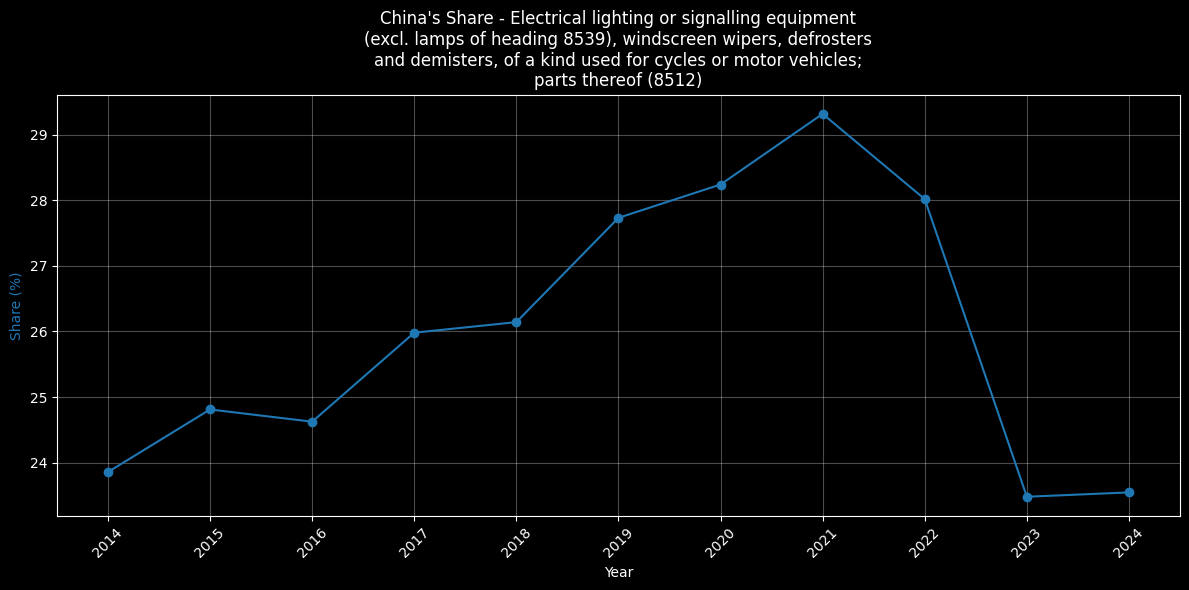

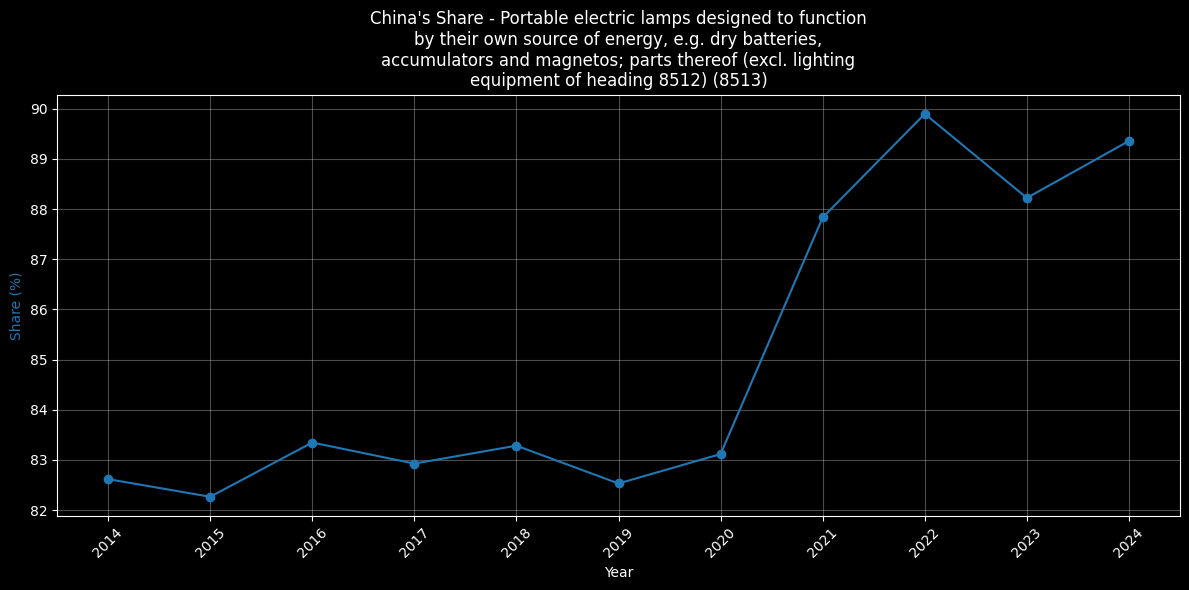

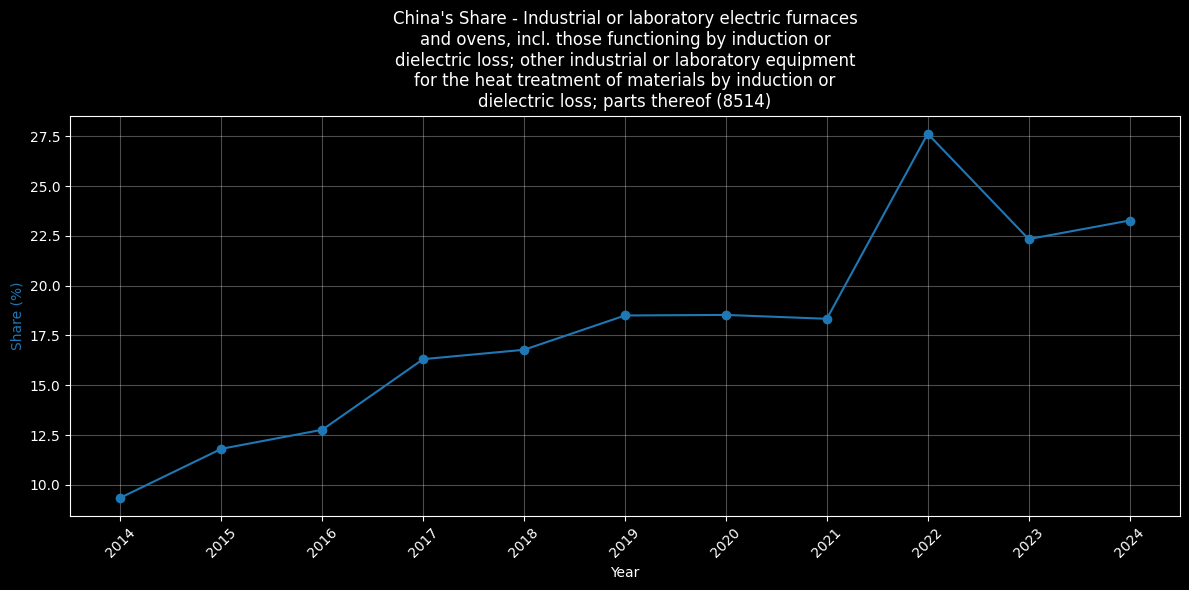

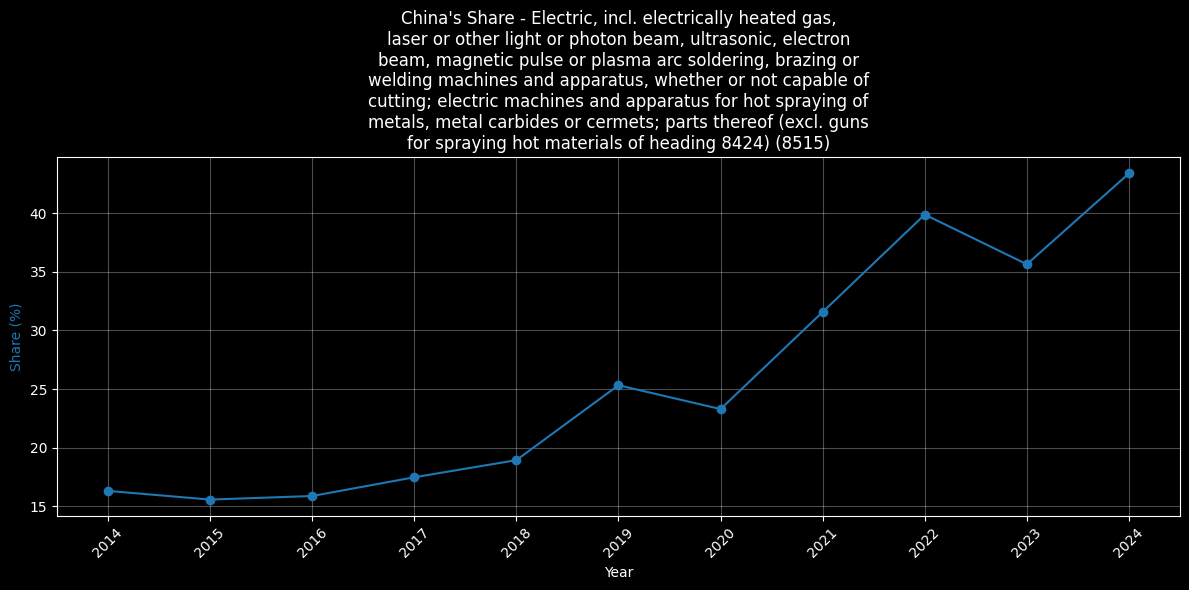

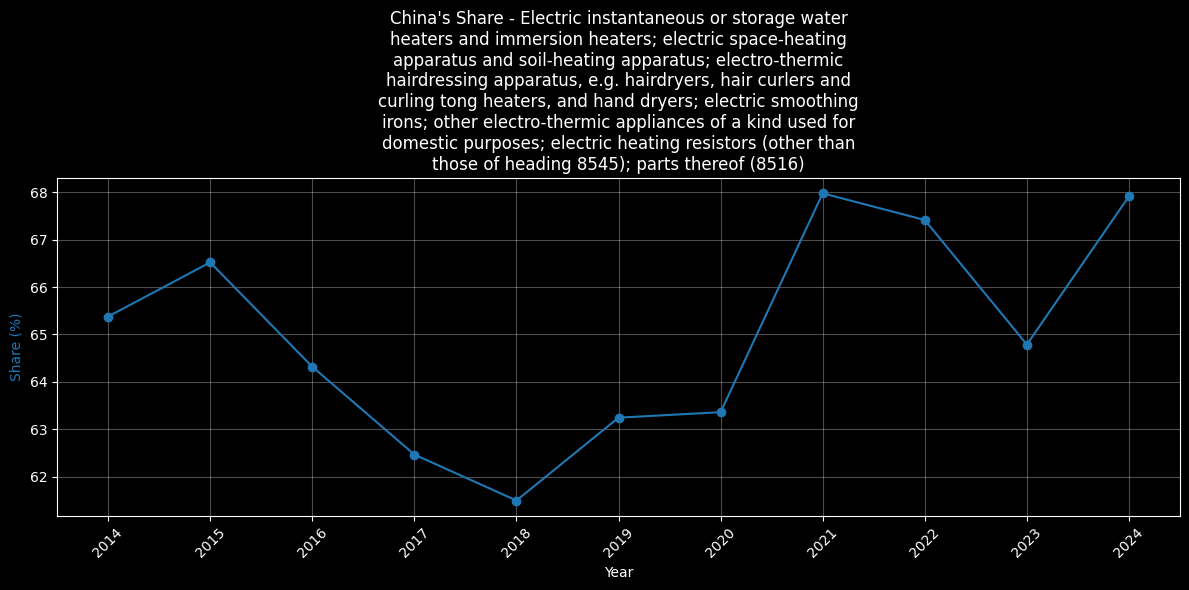

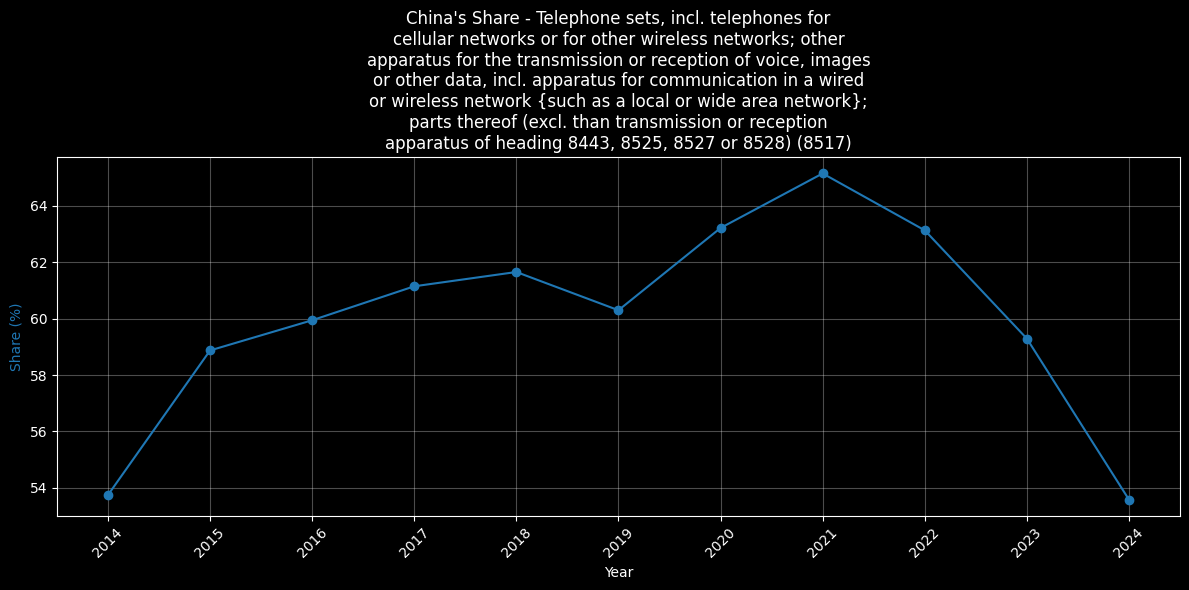

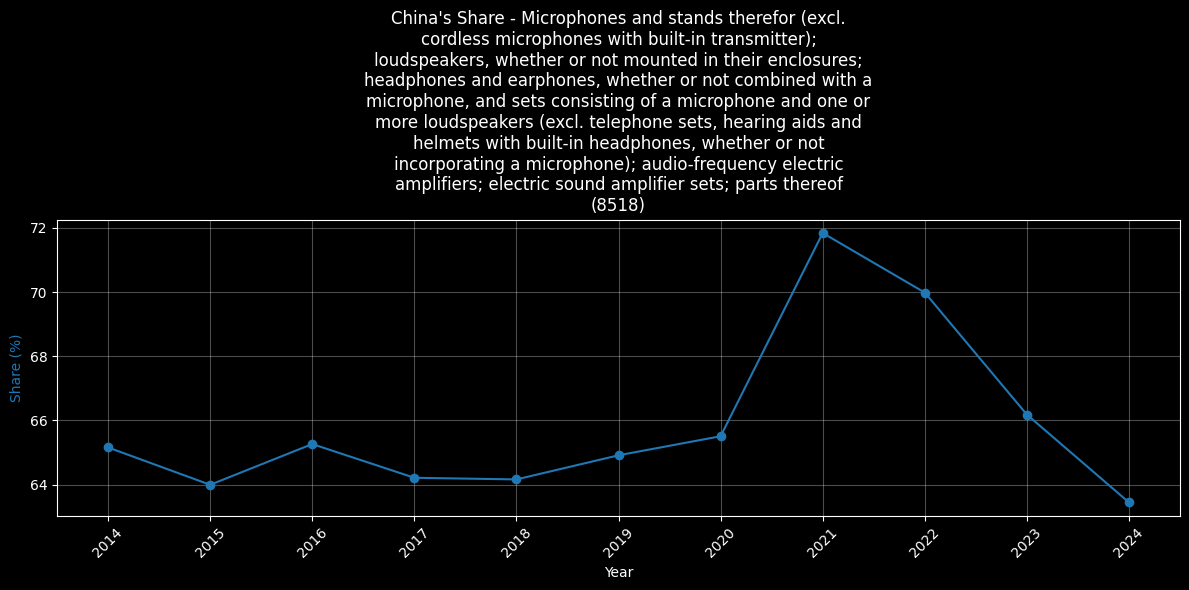

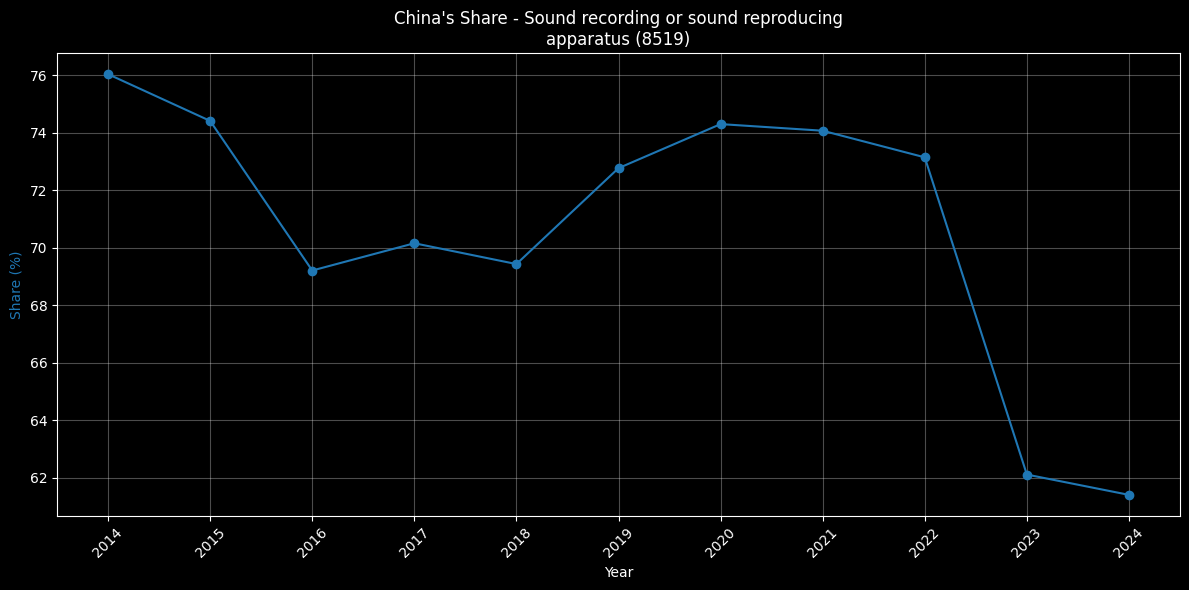

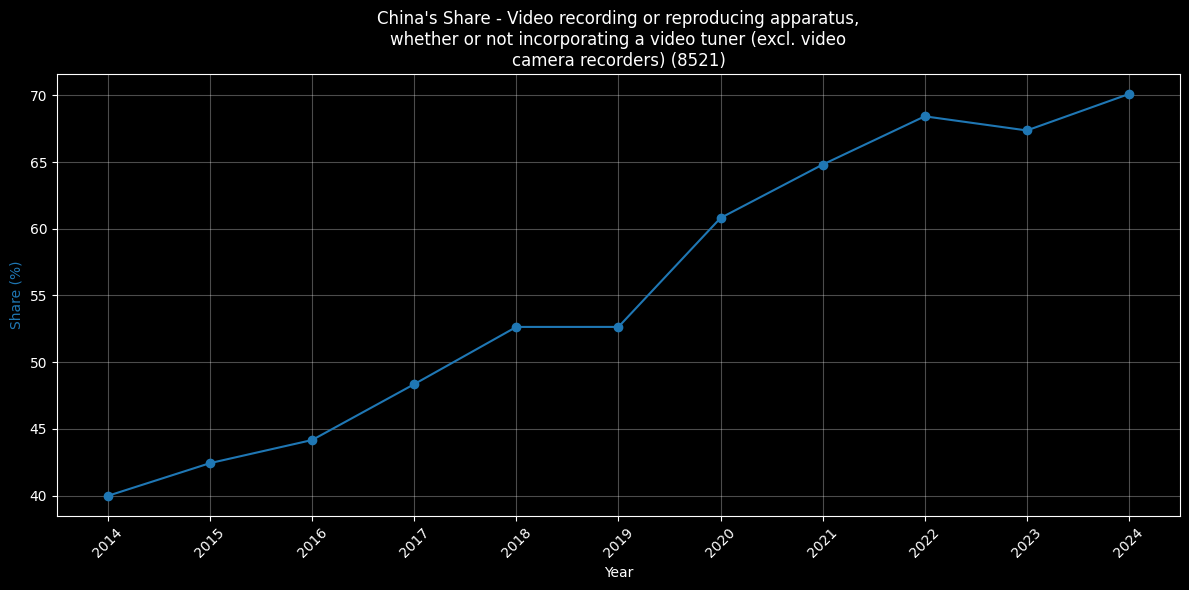

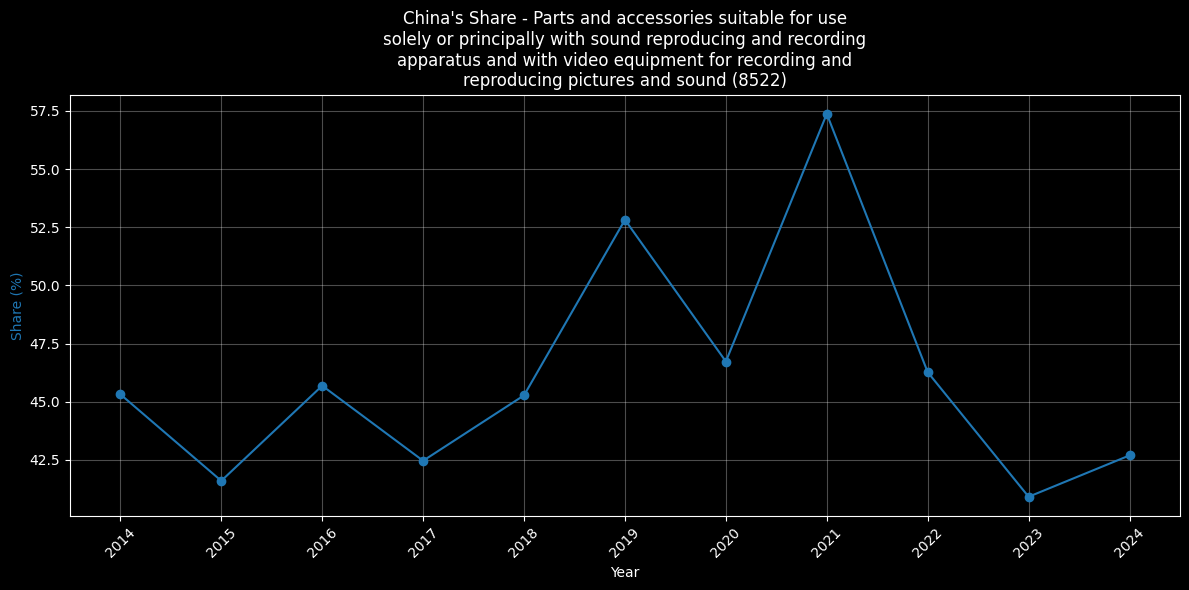

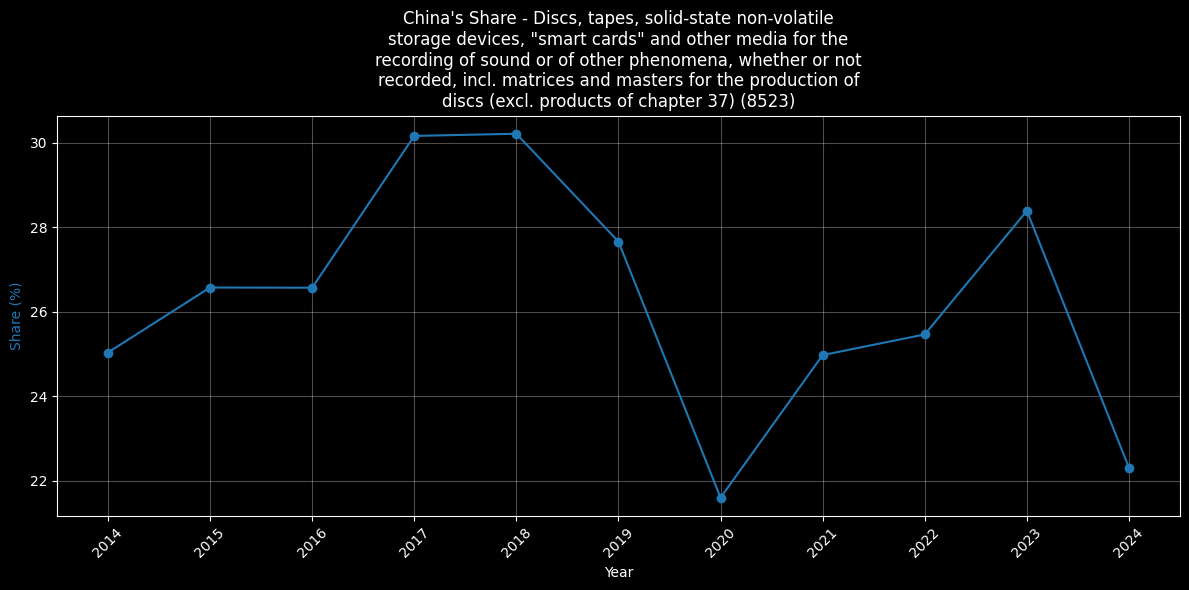

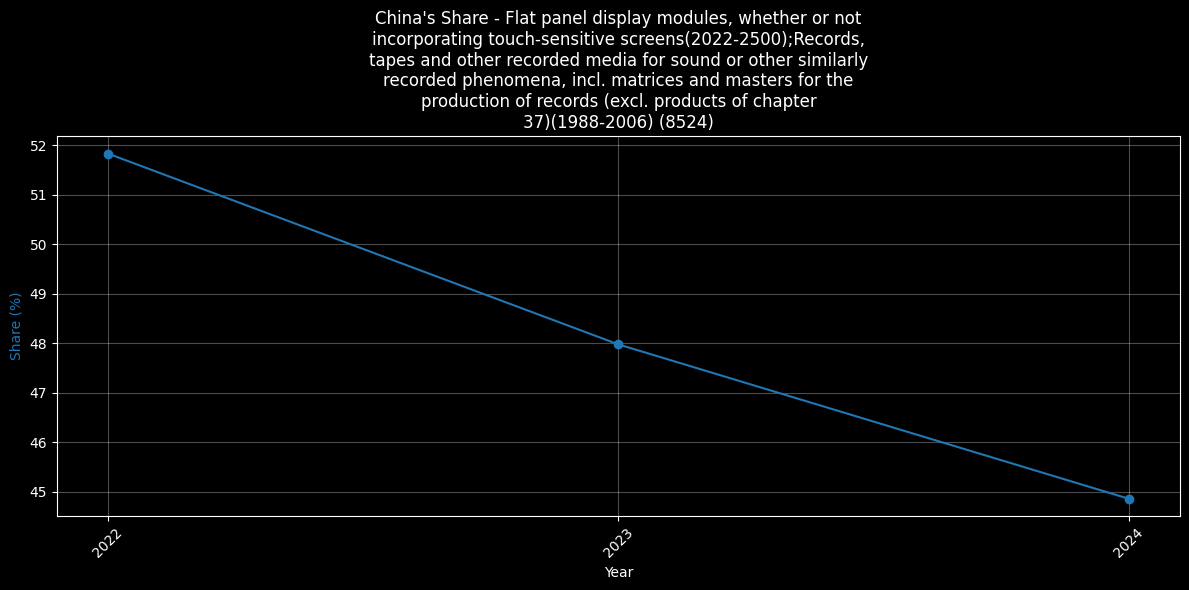

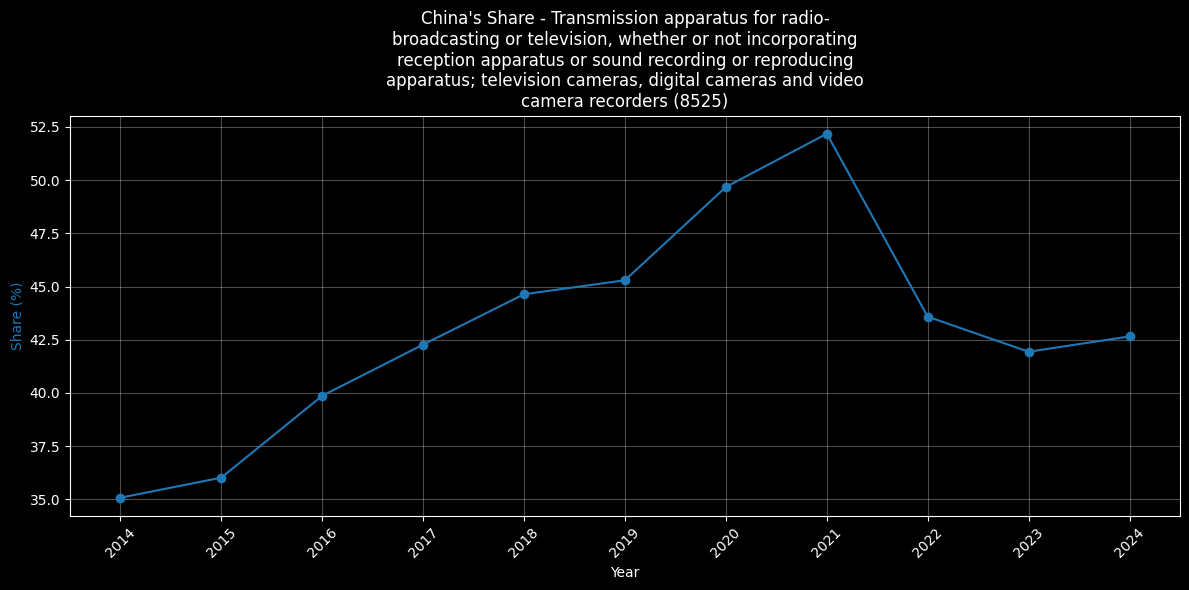

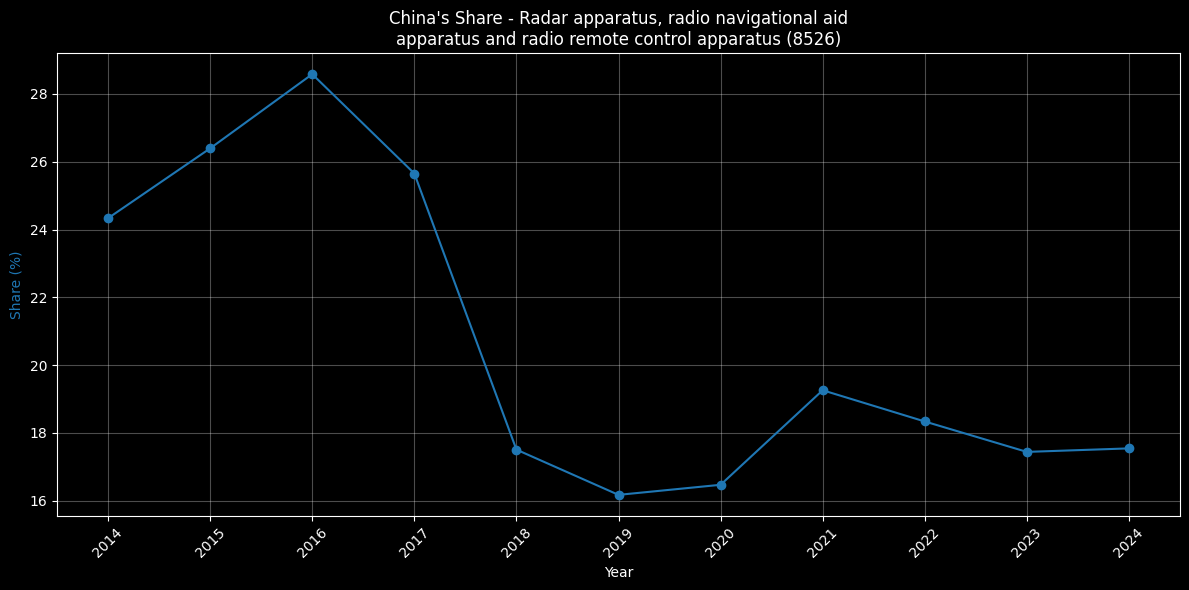

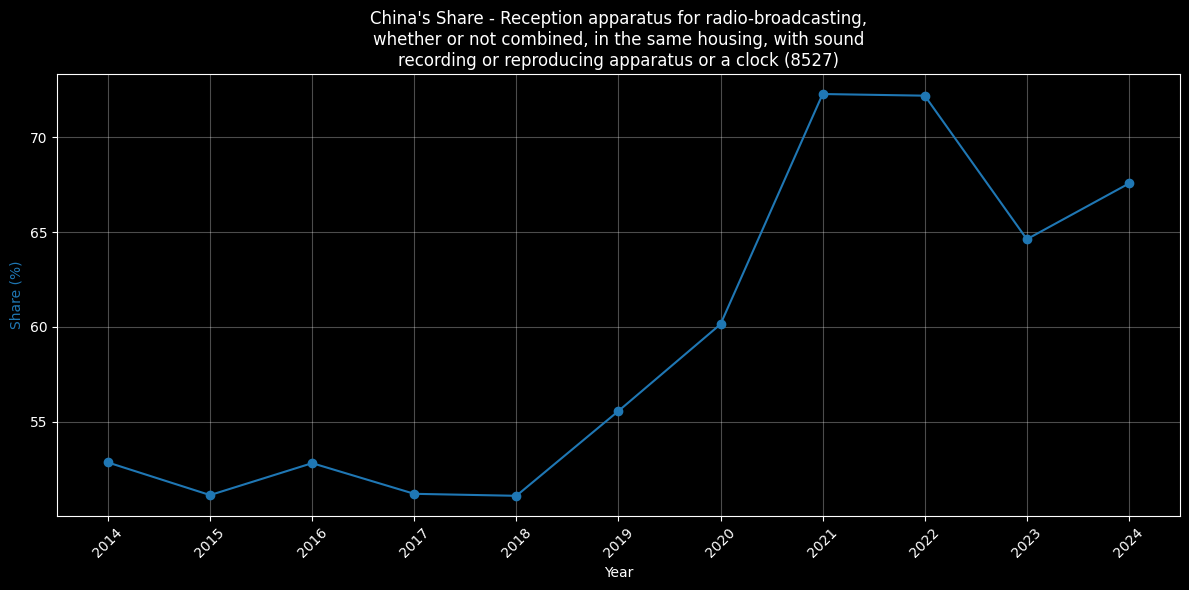

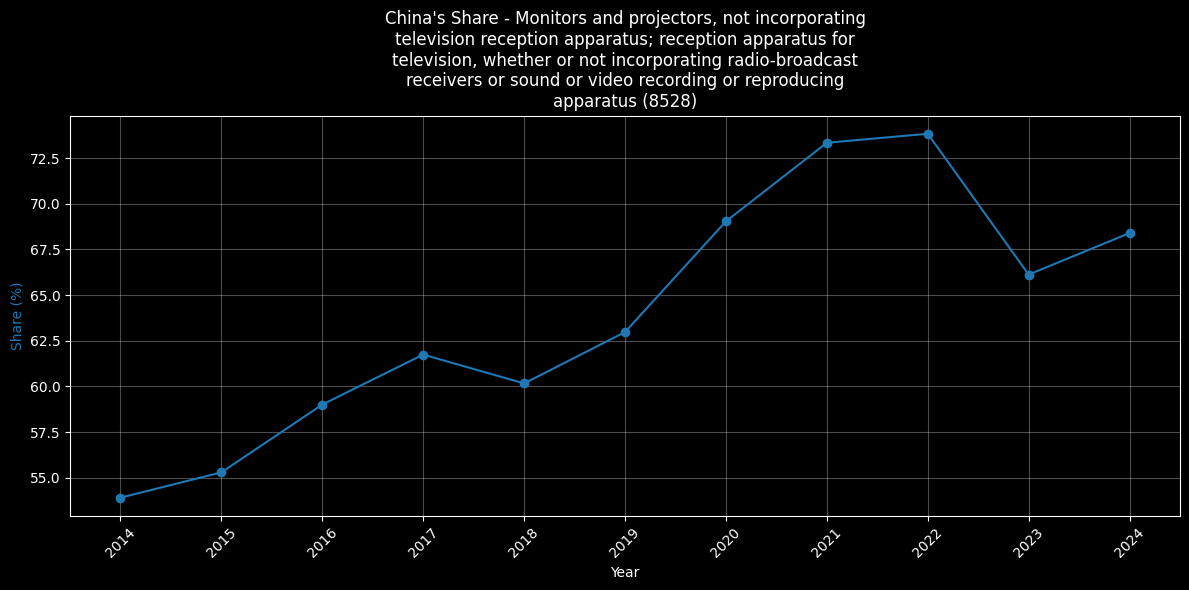

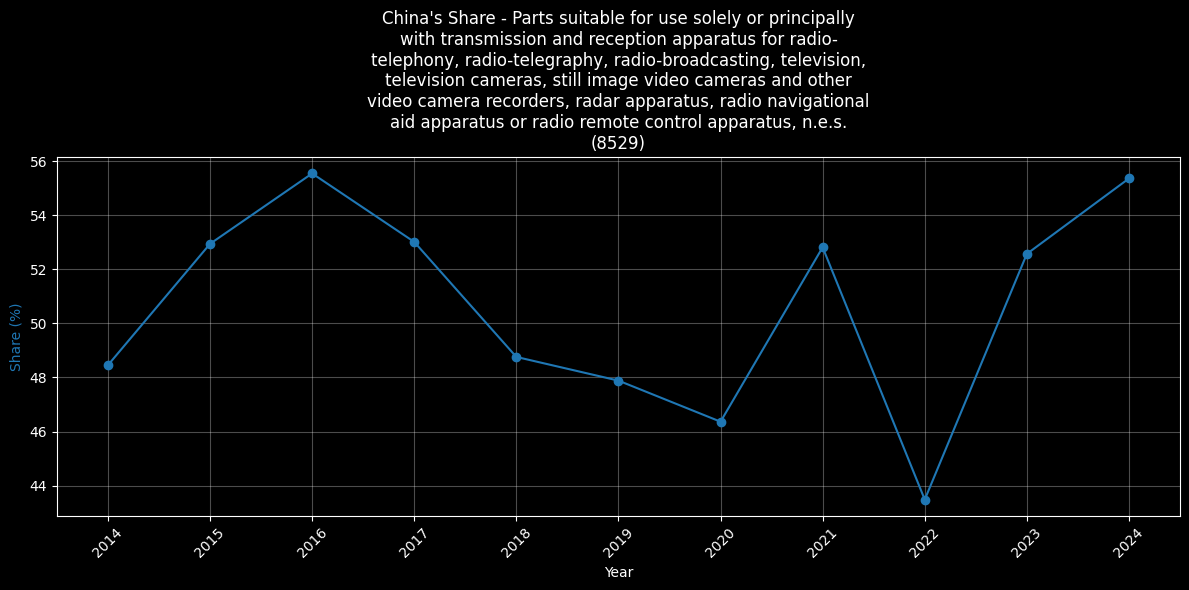

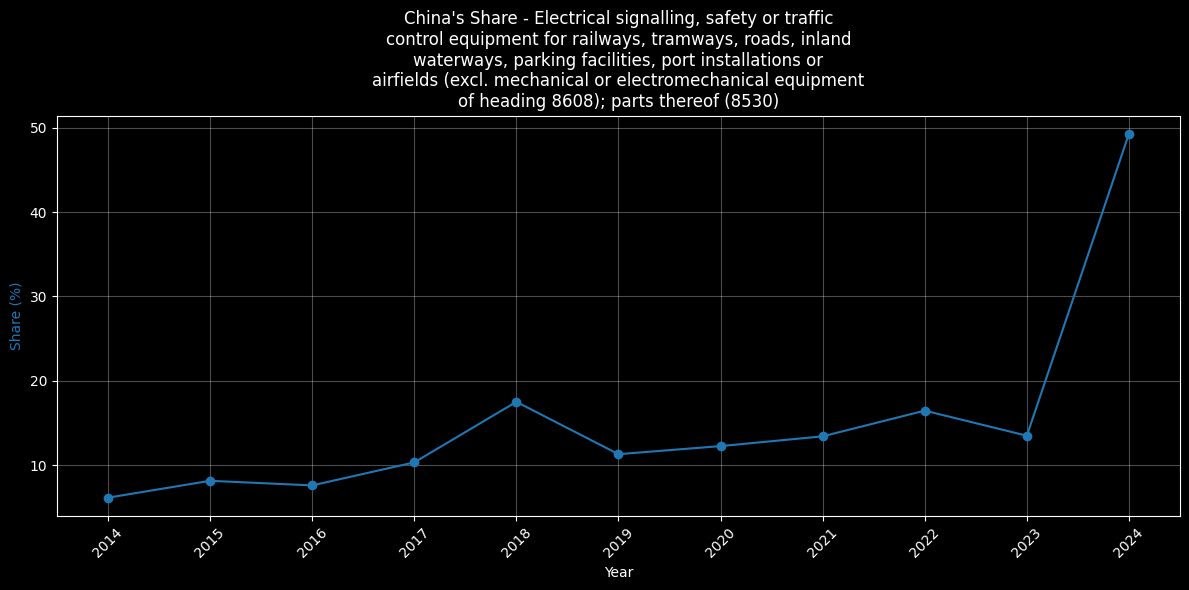

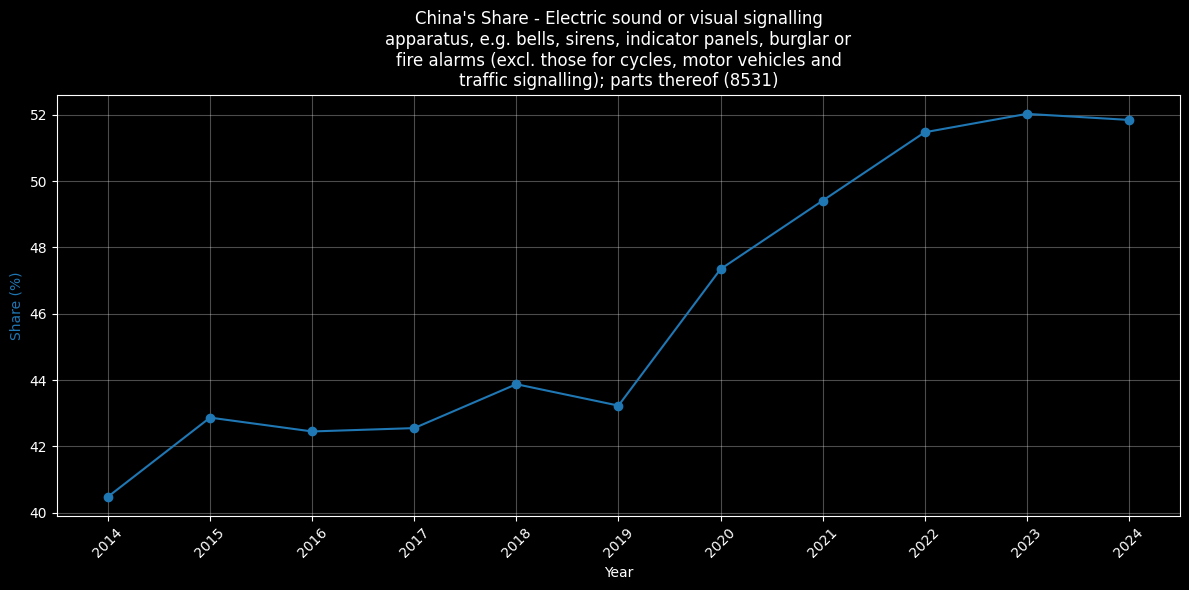

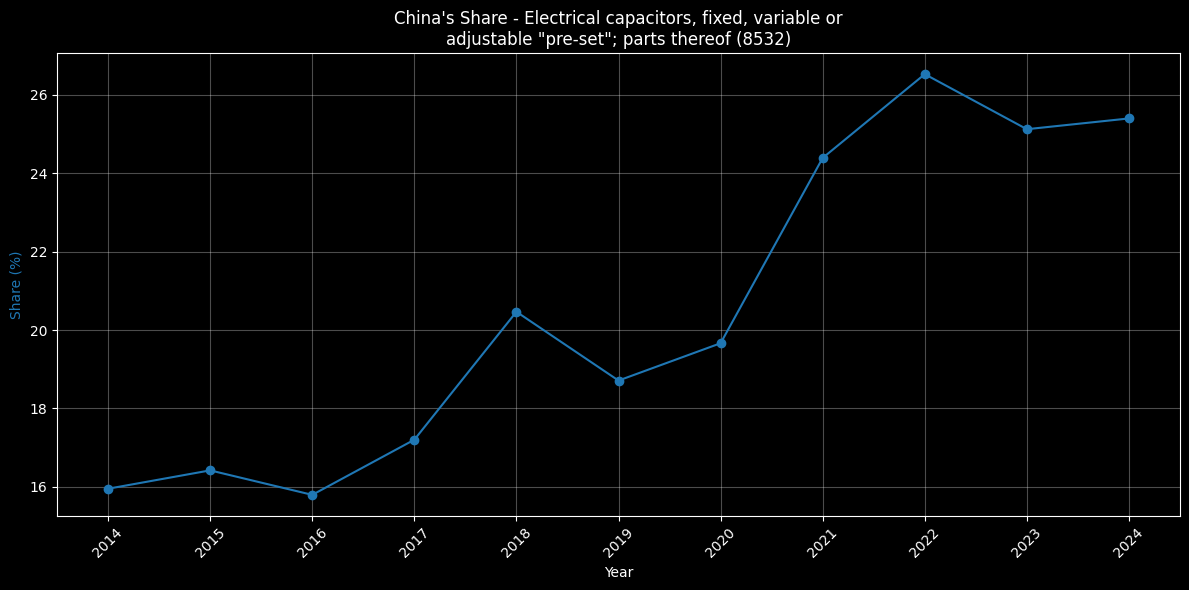

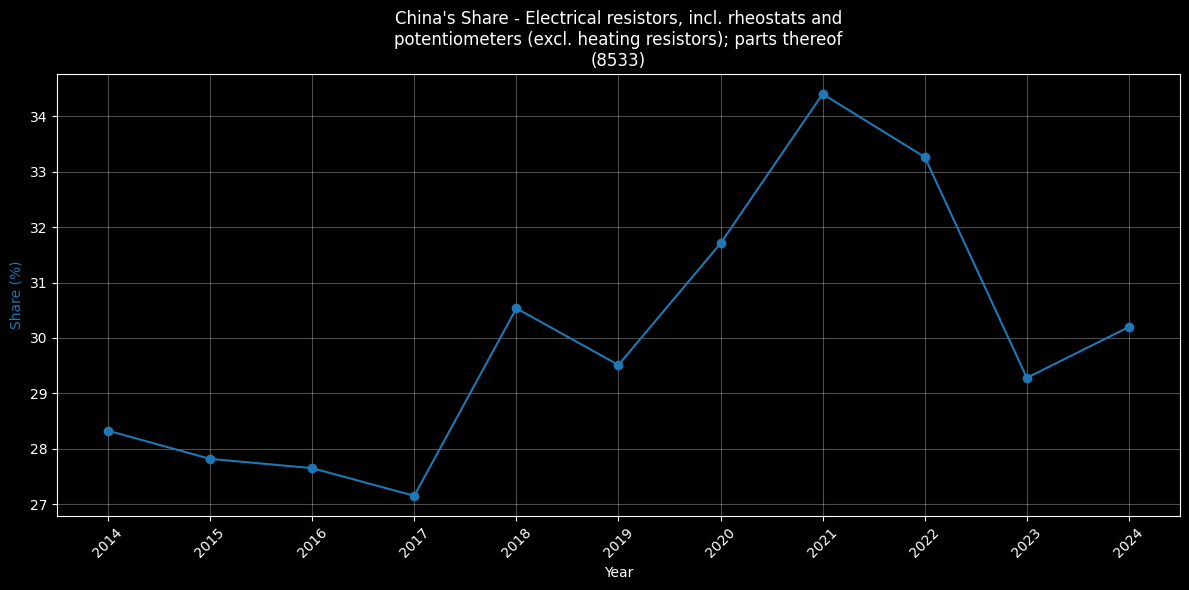

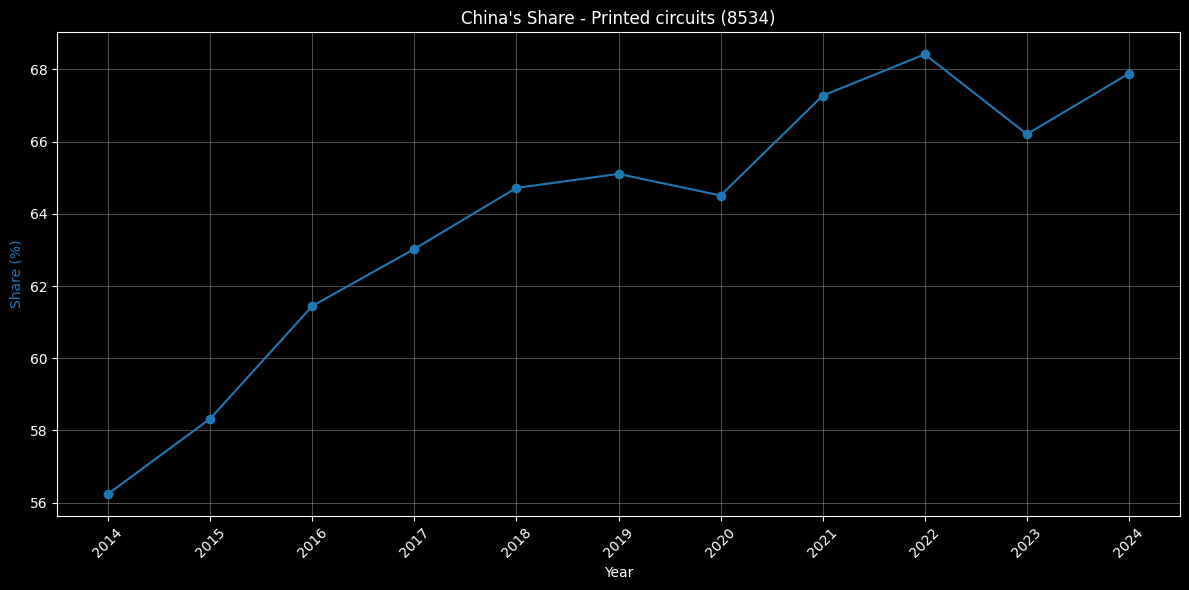

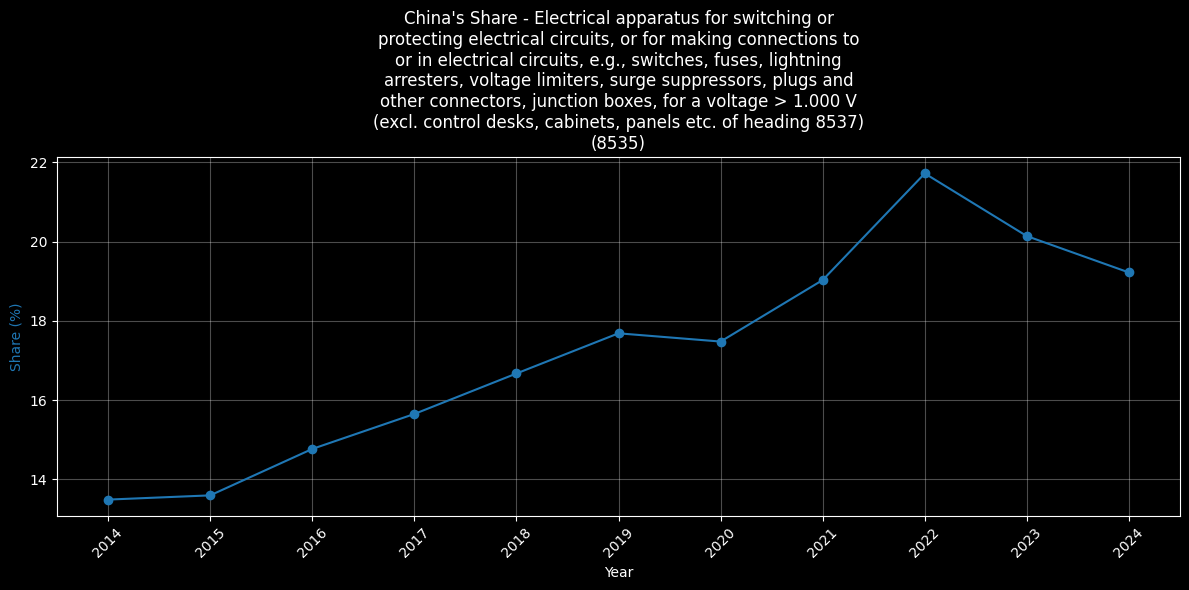

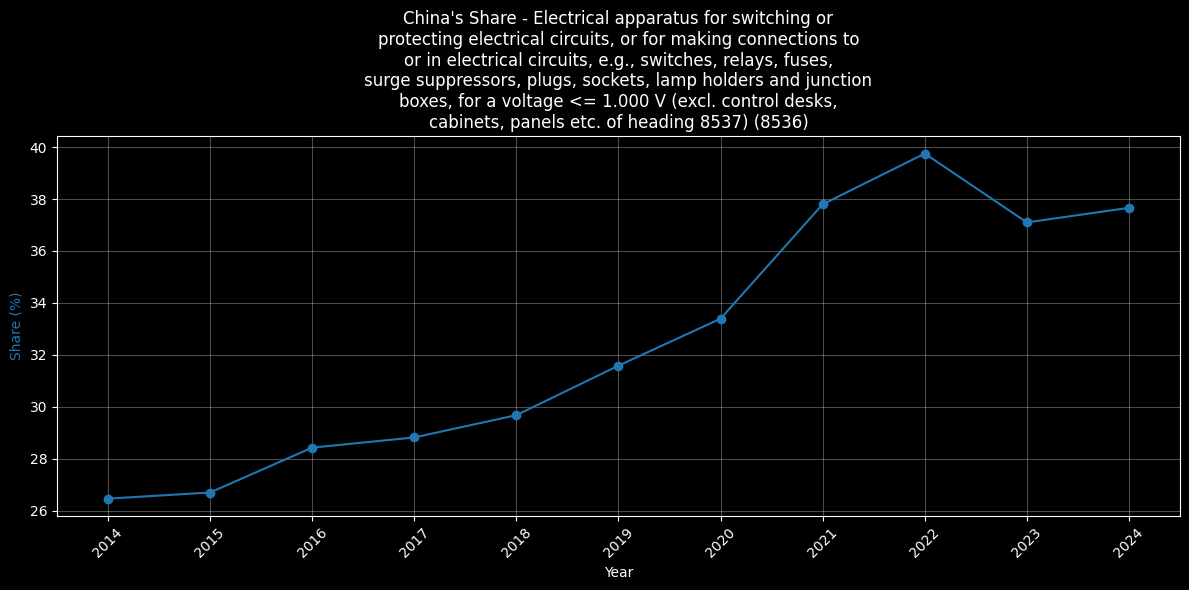

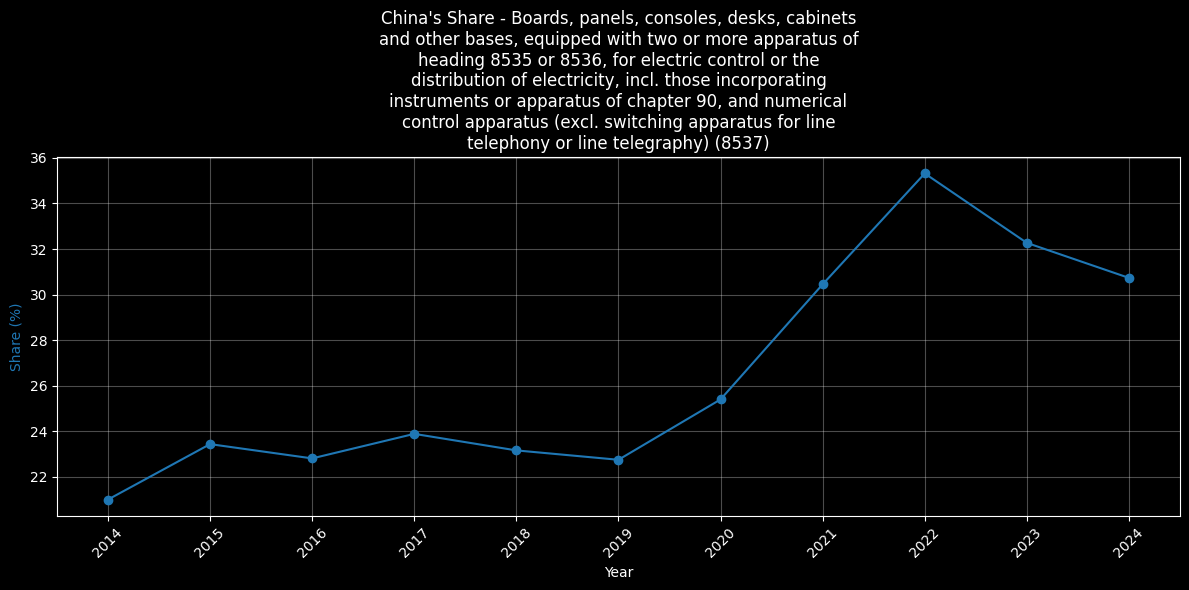

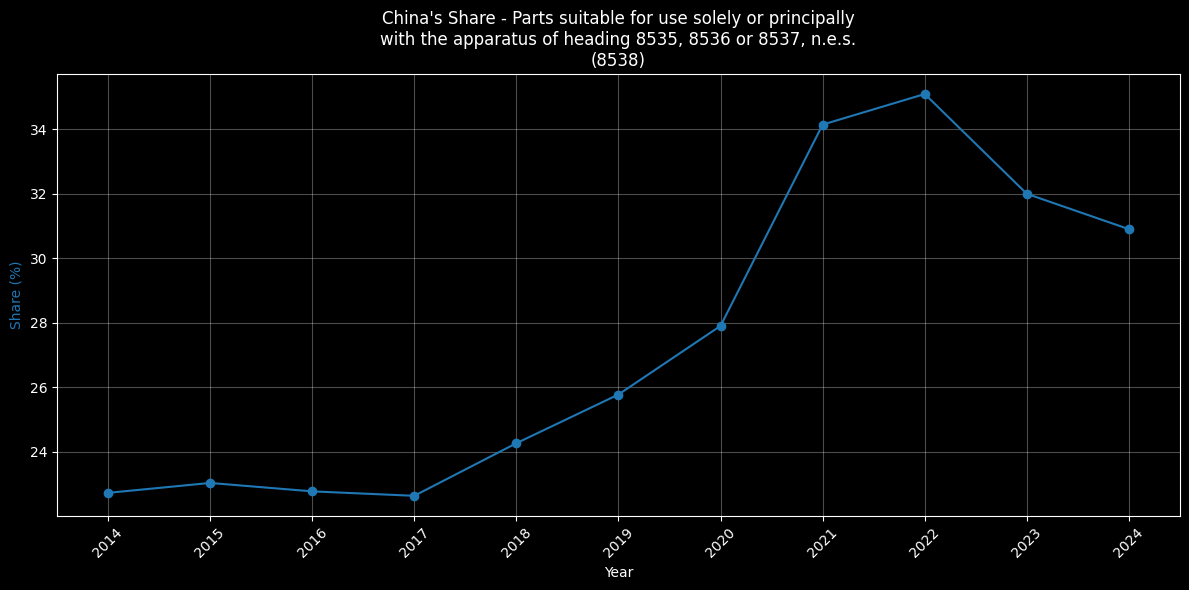

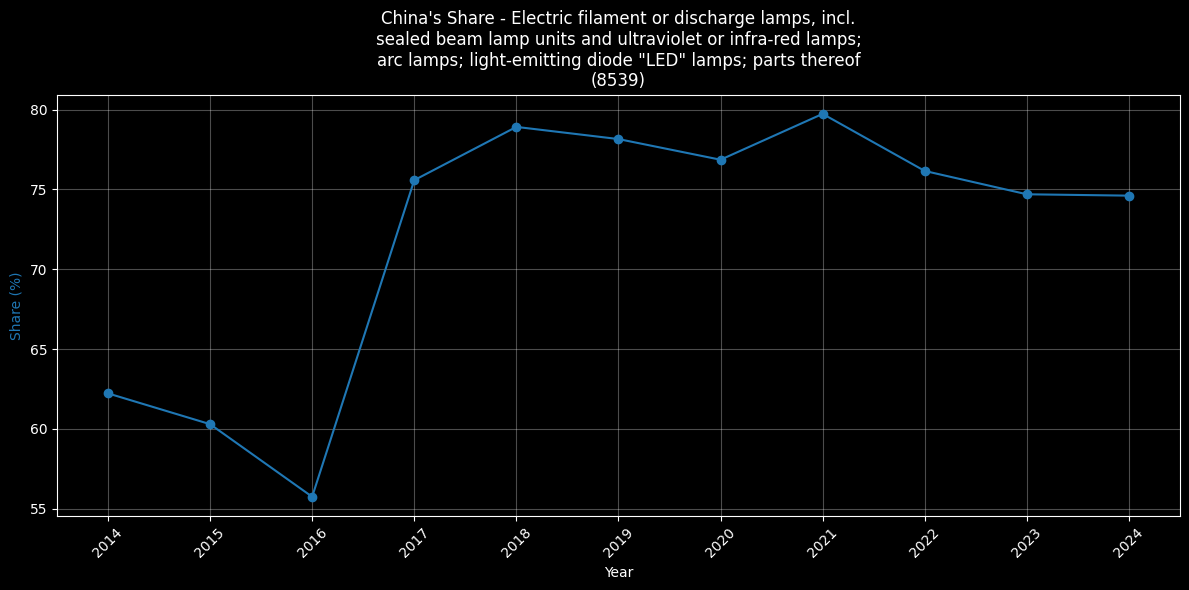

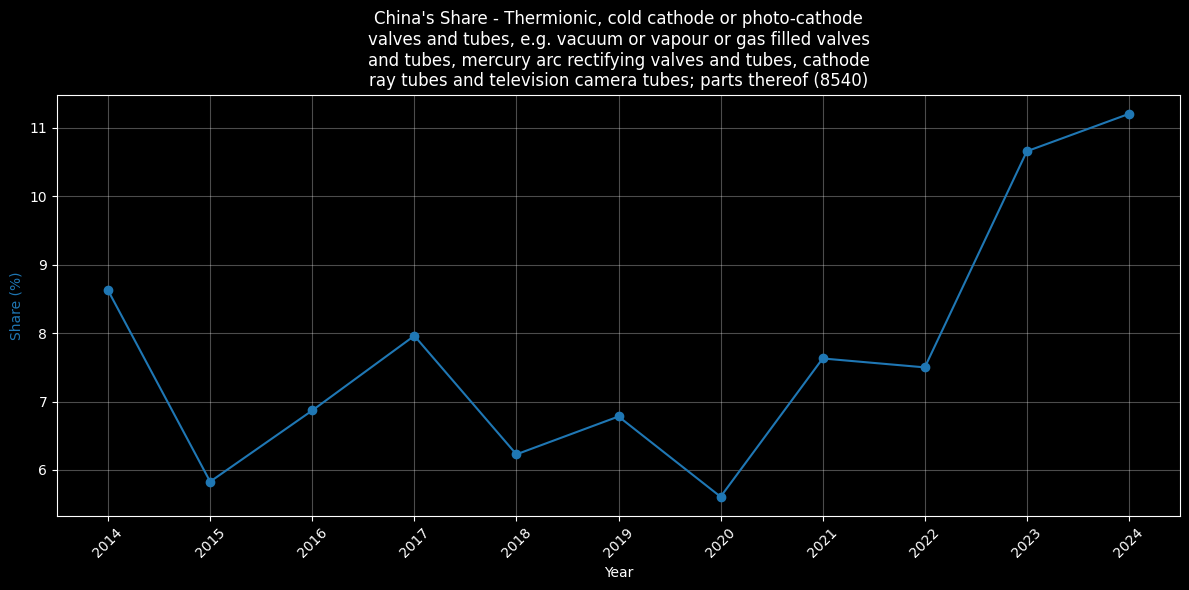

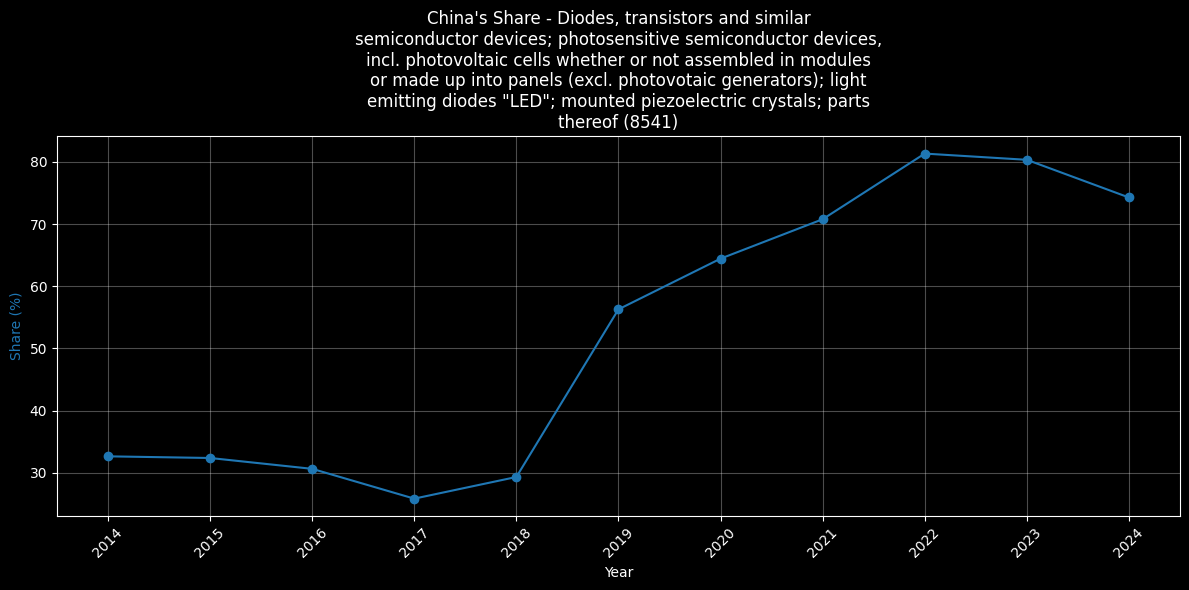

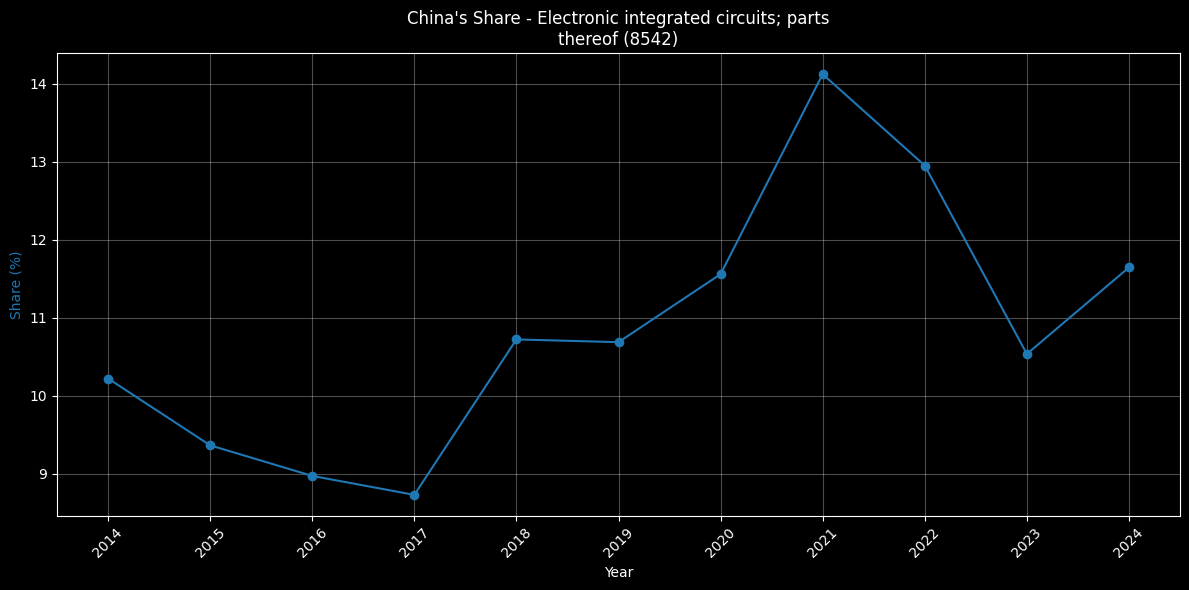

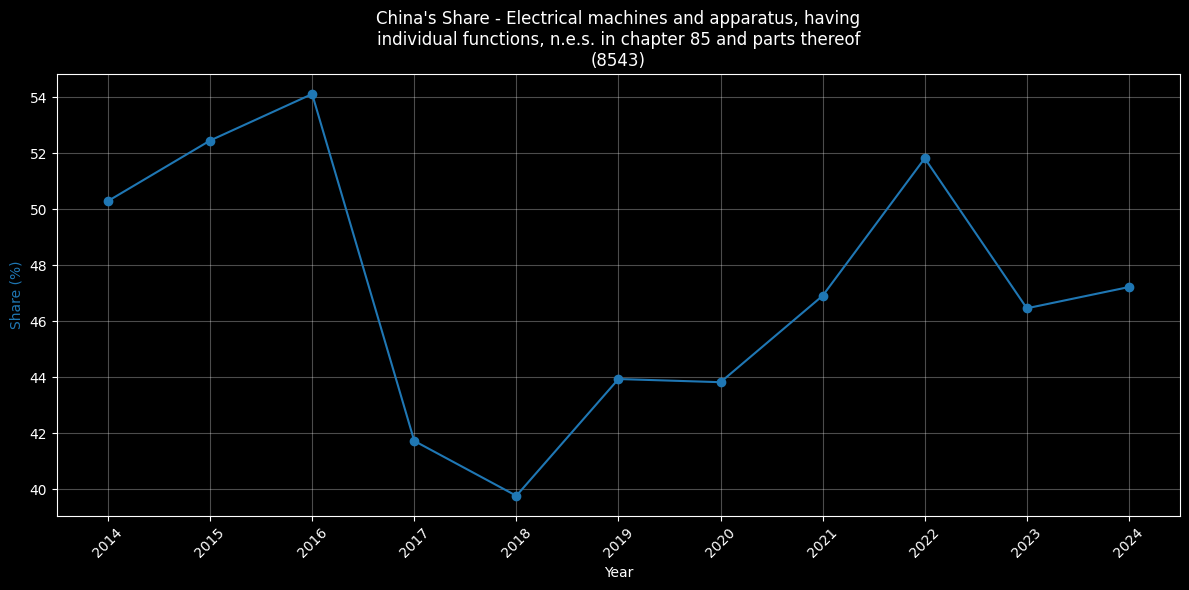

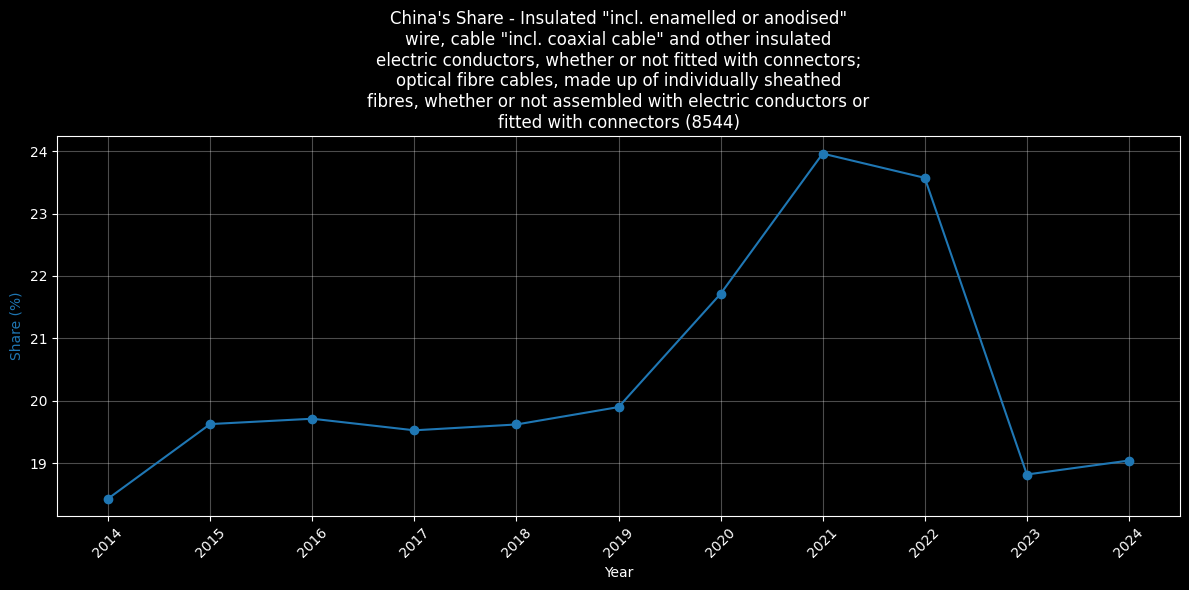

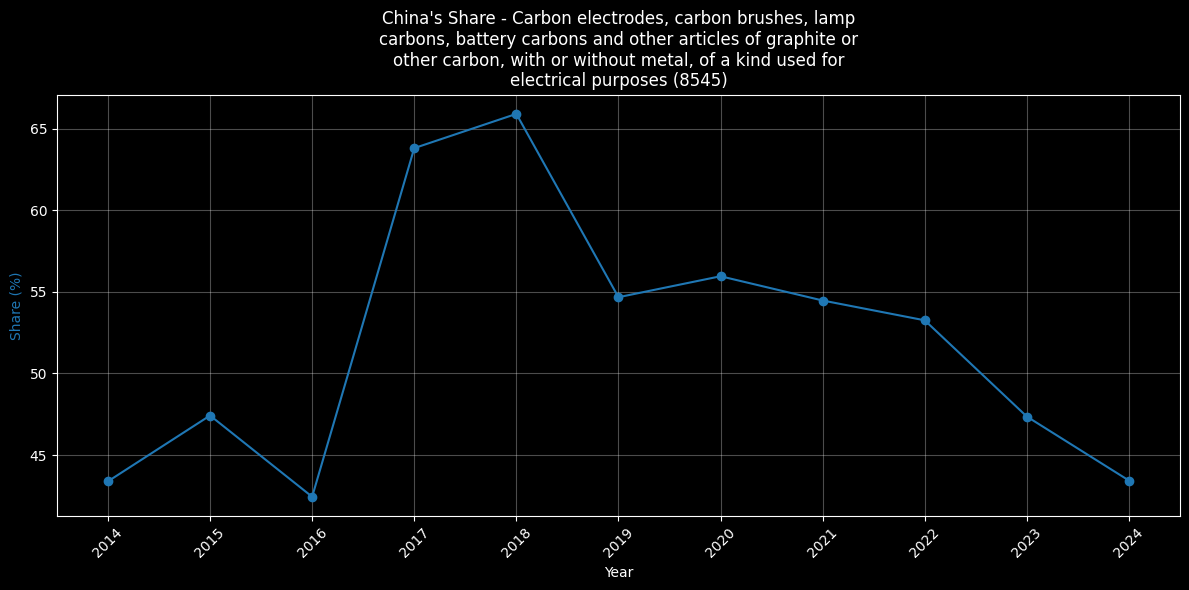

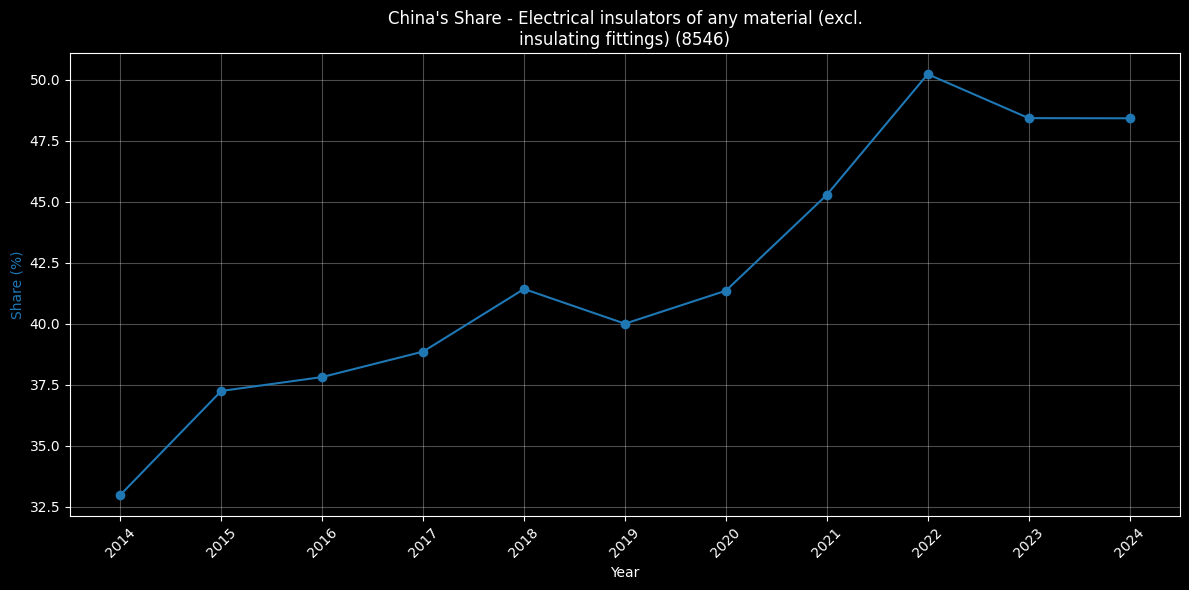

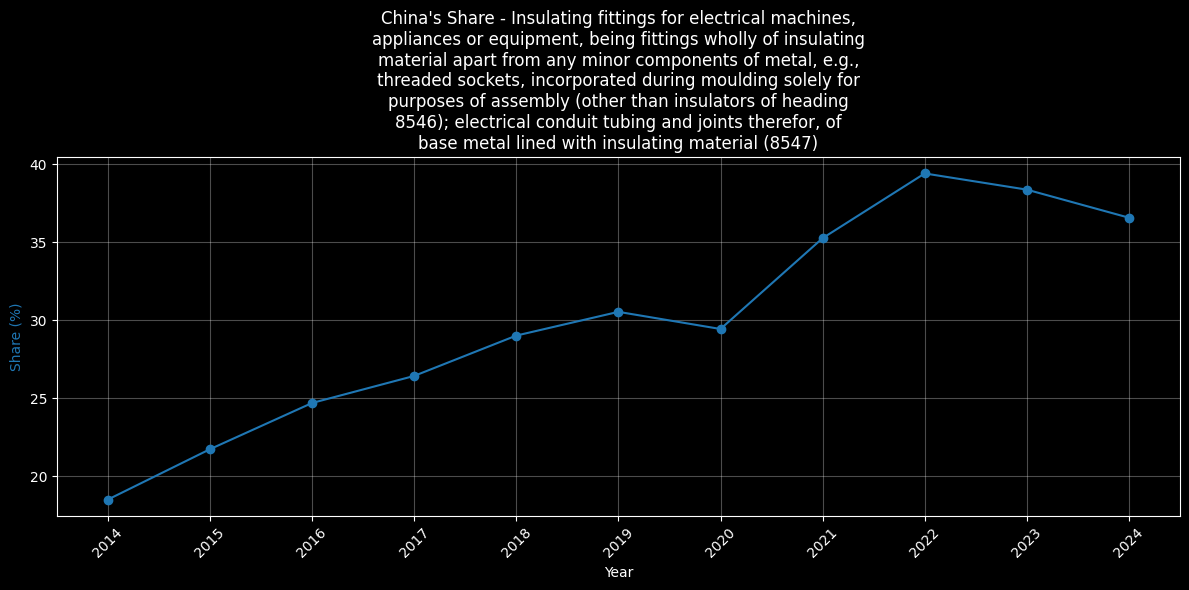

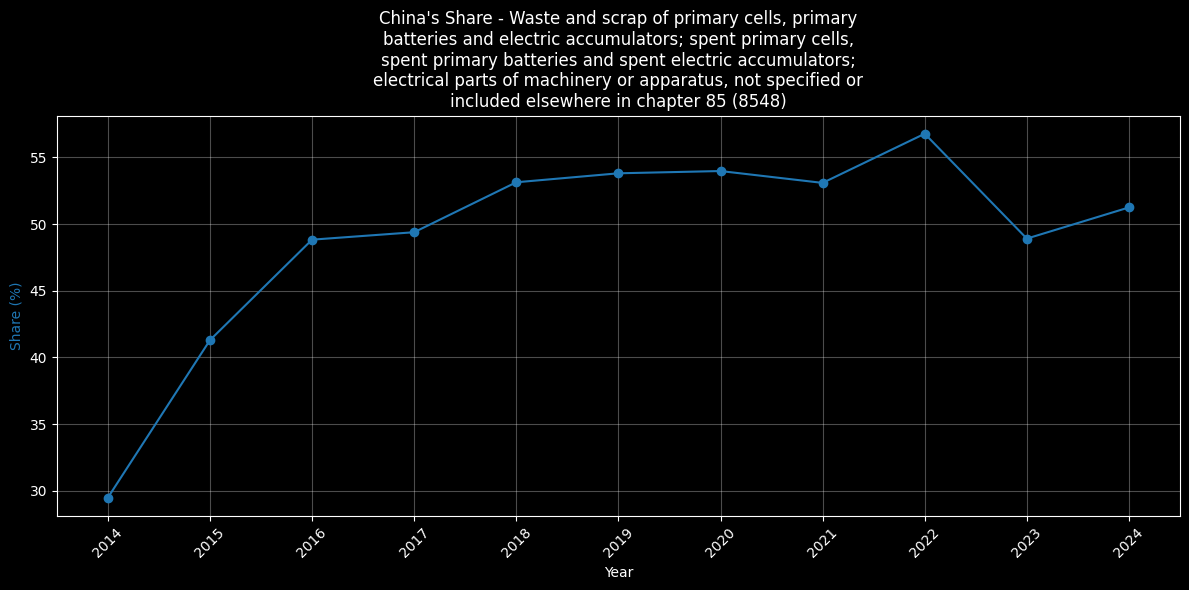

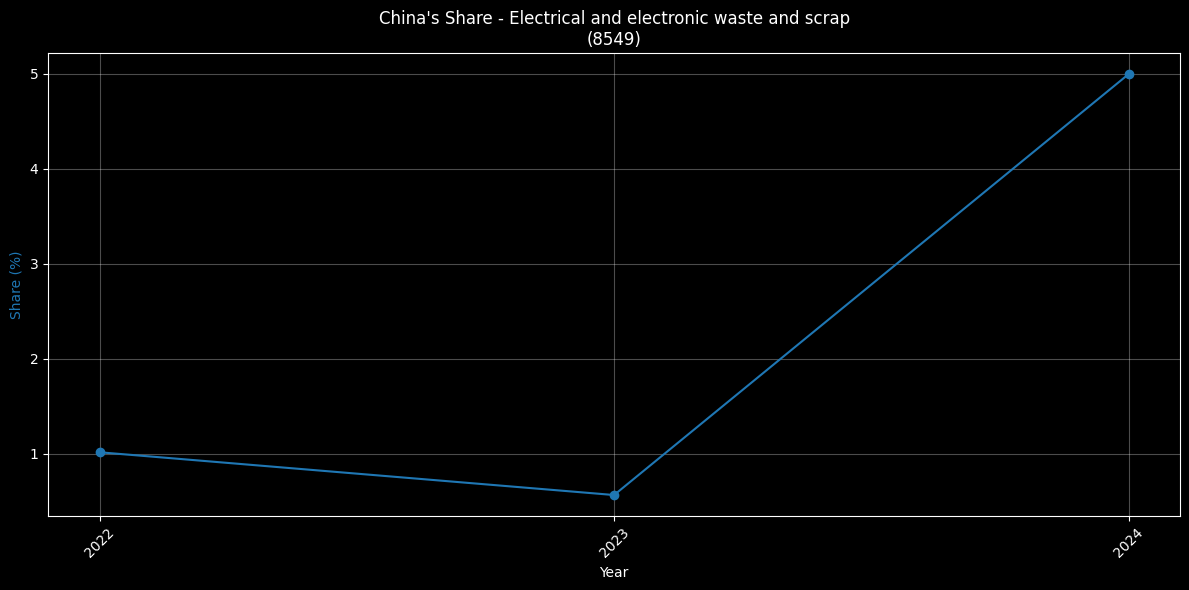

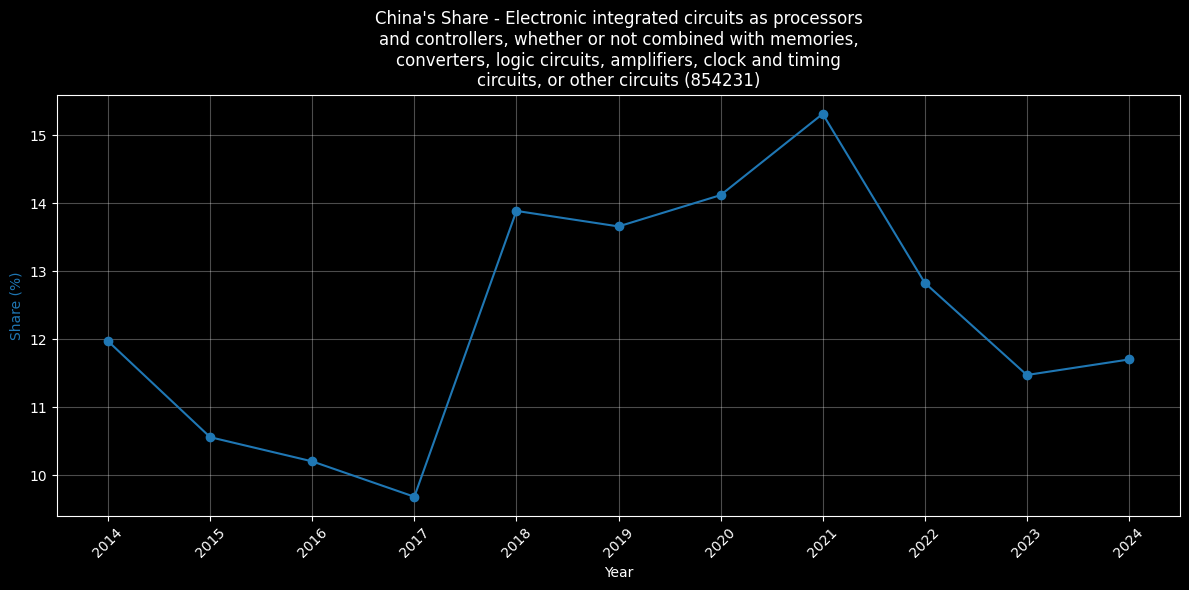

In [5]:
# Line chart: China's share over time for each product
for code in product_codes:
    plot_share_over_time(result, code, partner_code="CN")

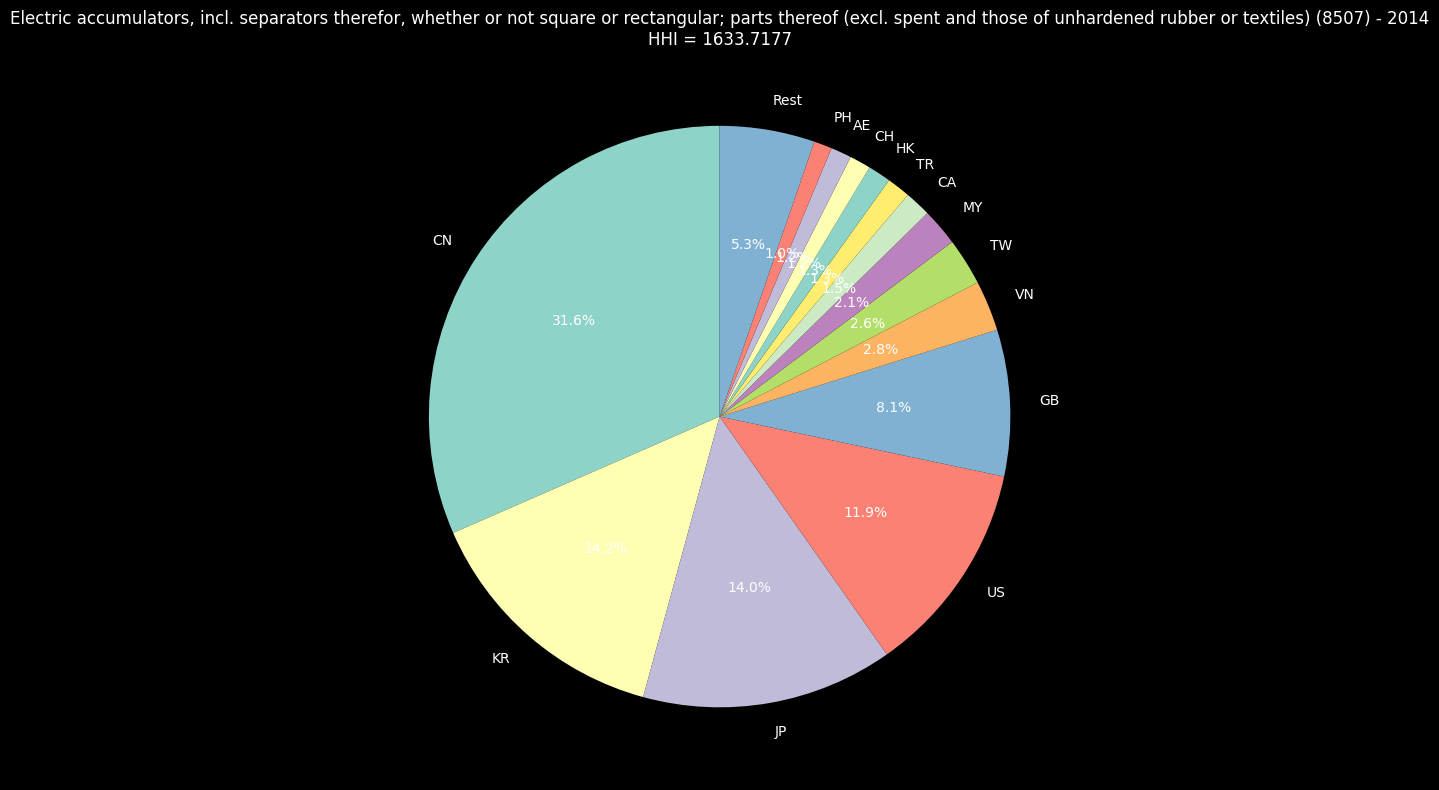

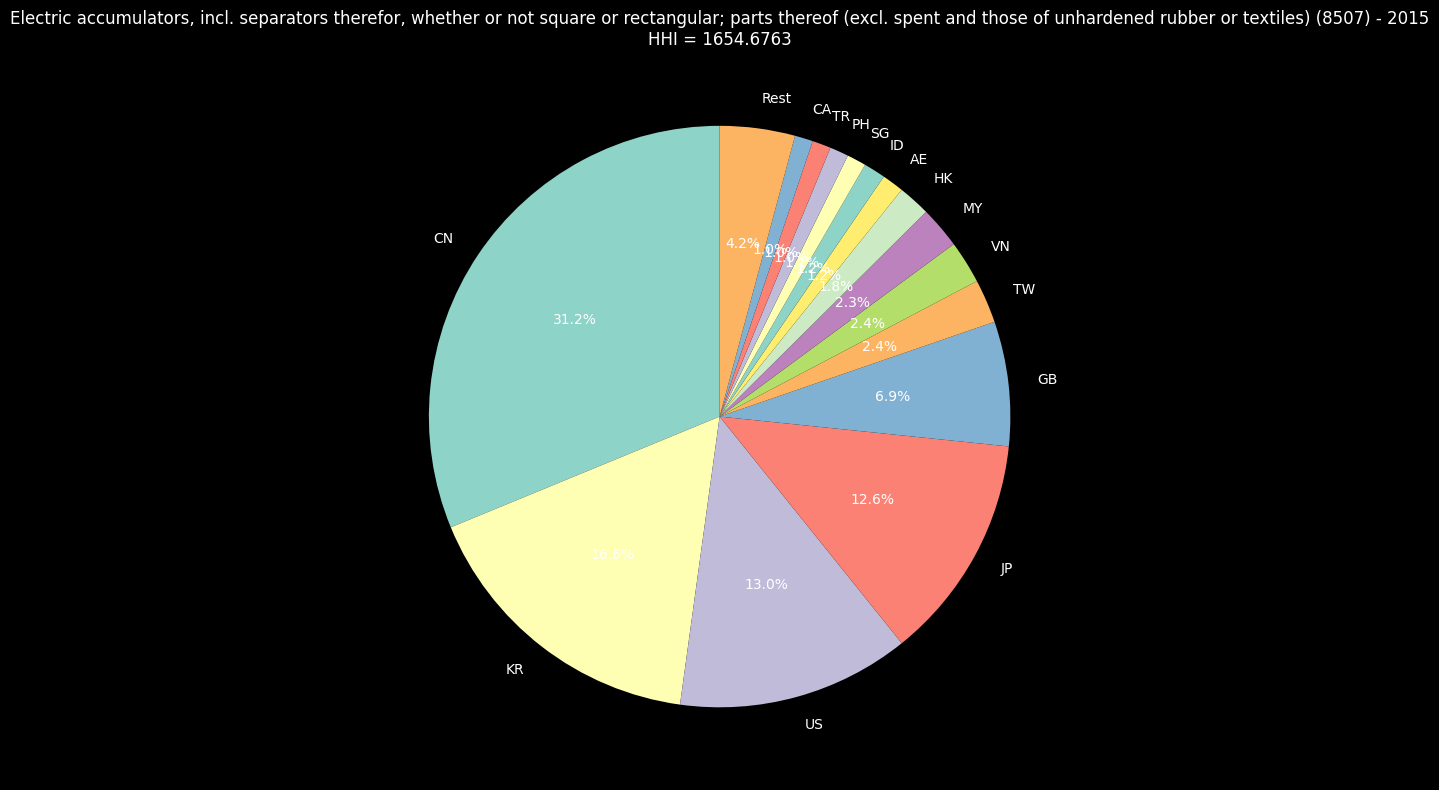

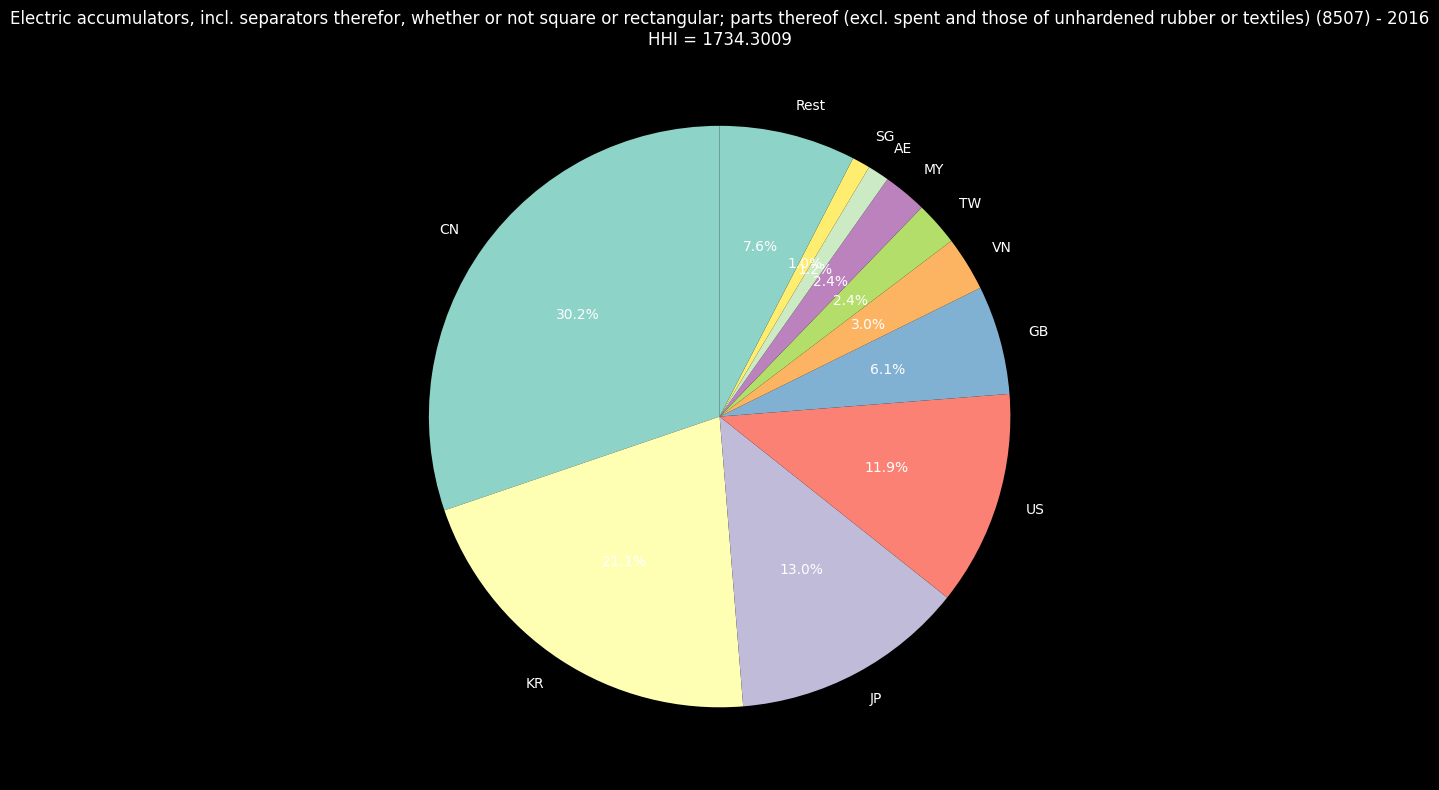

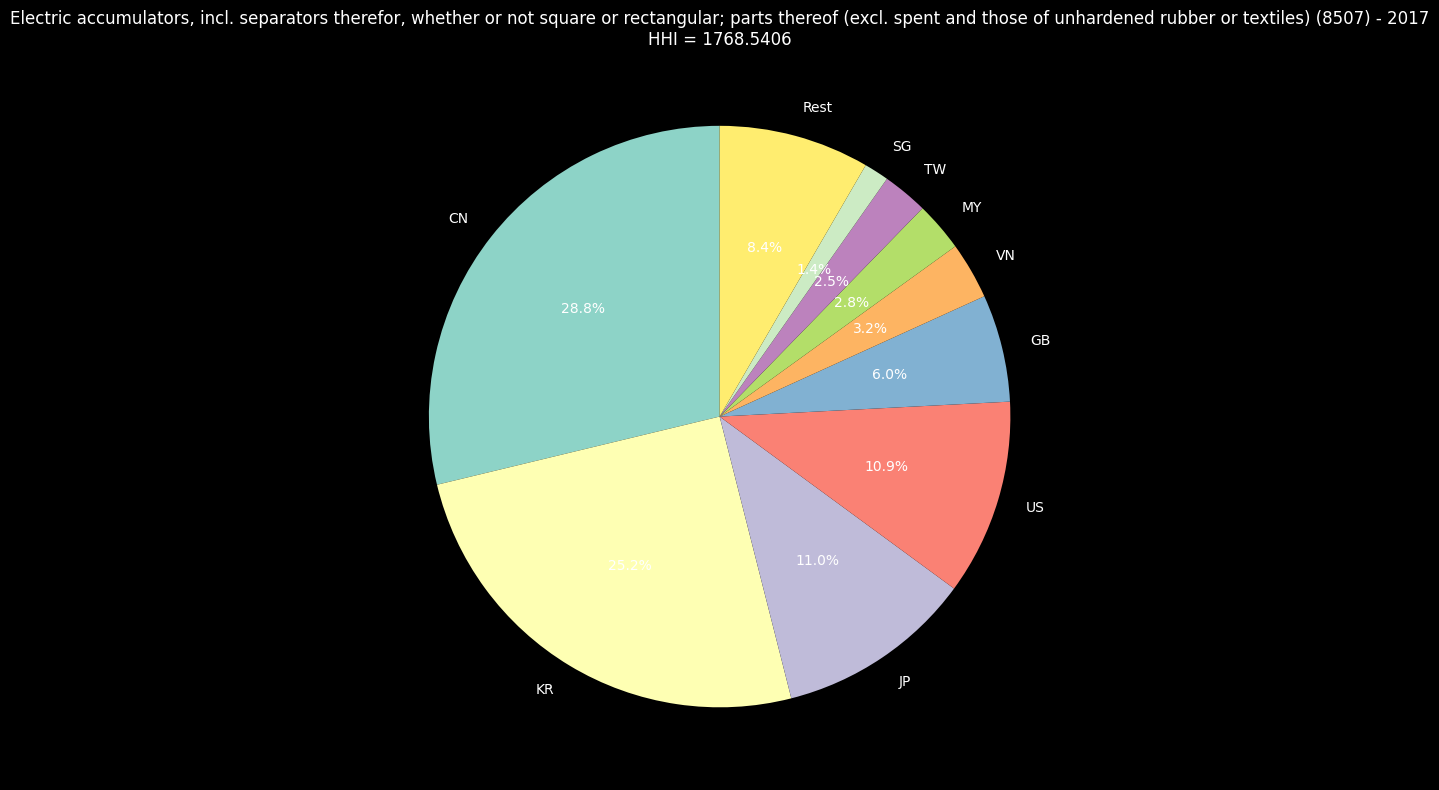

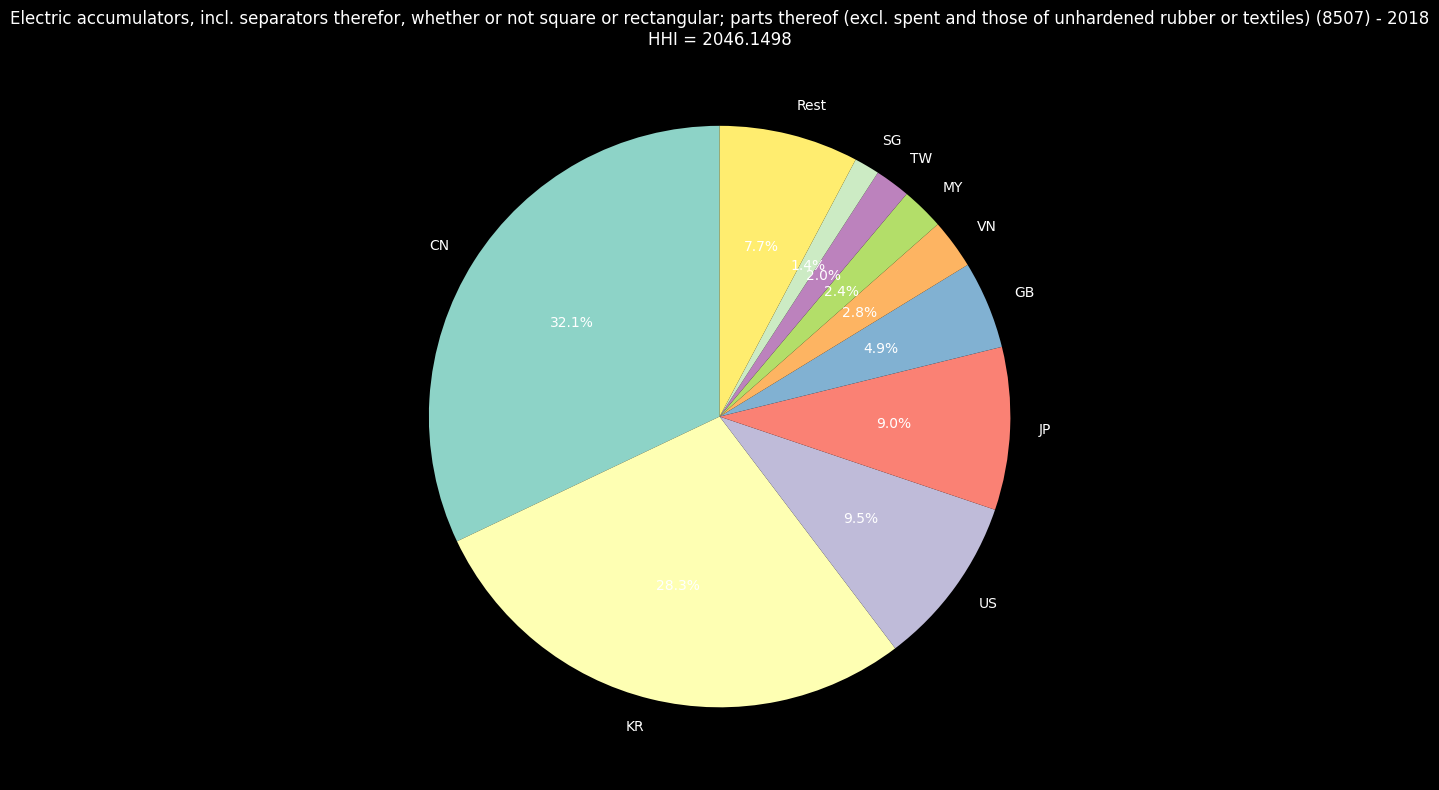

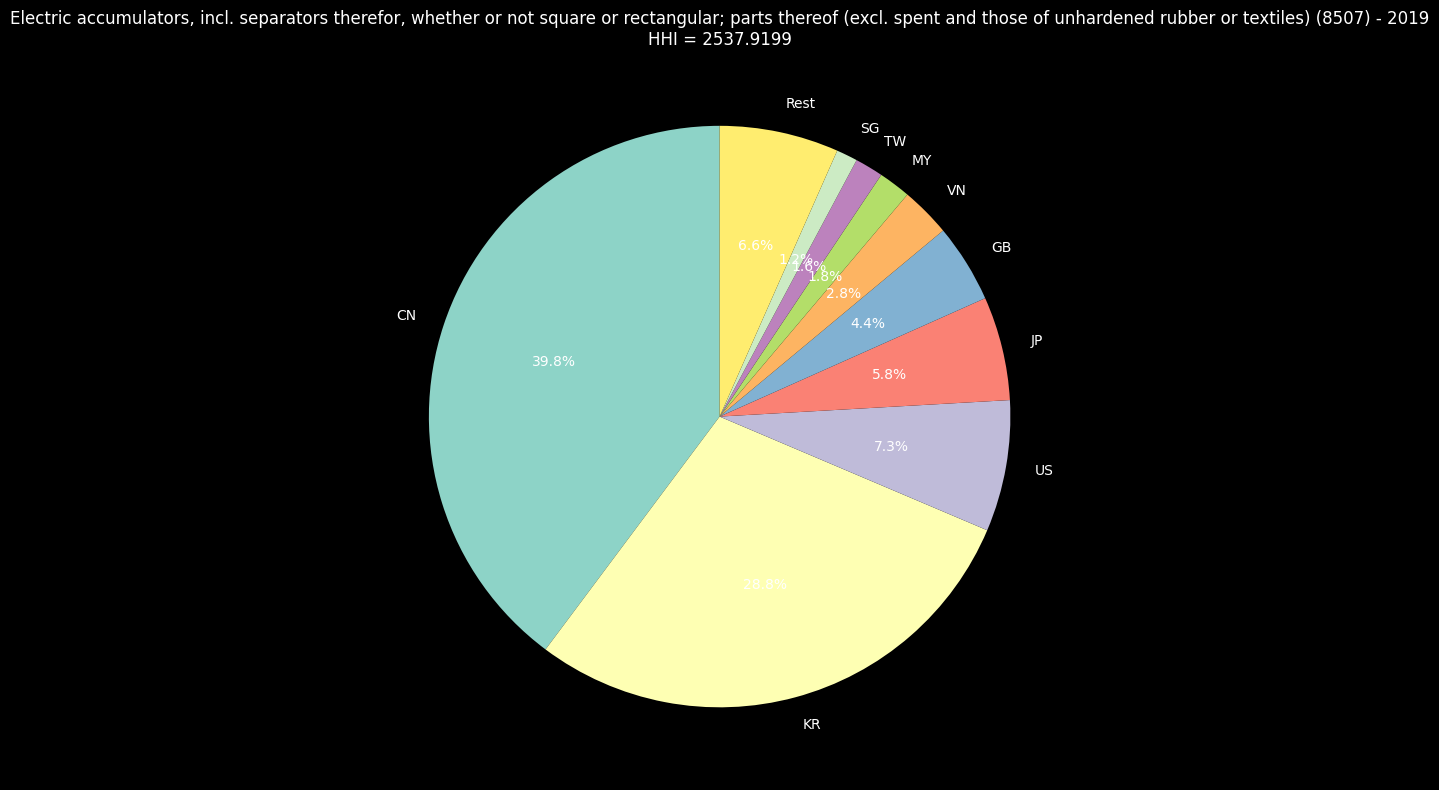

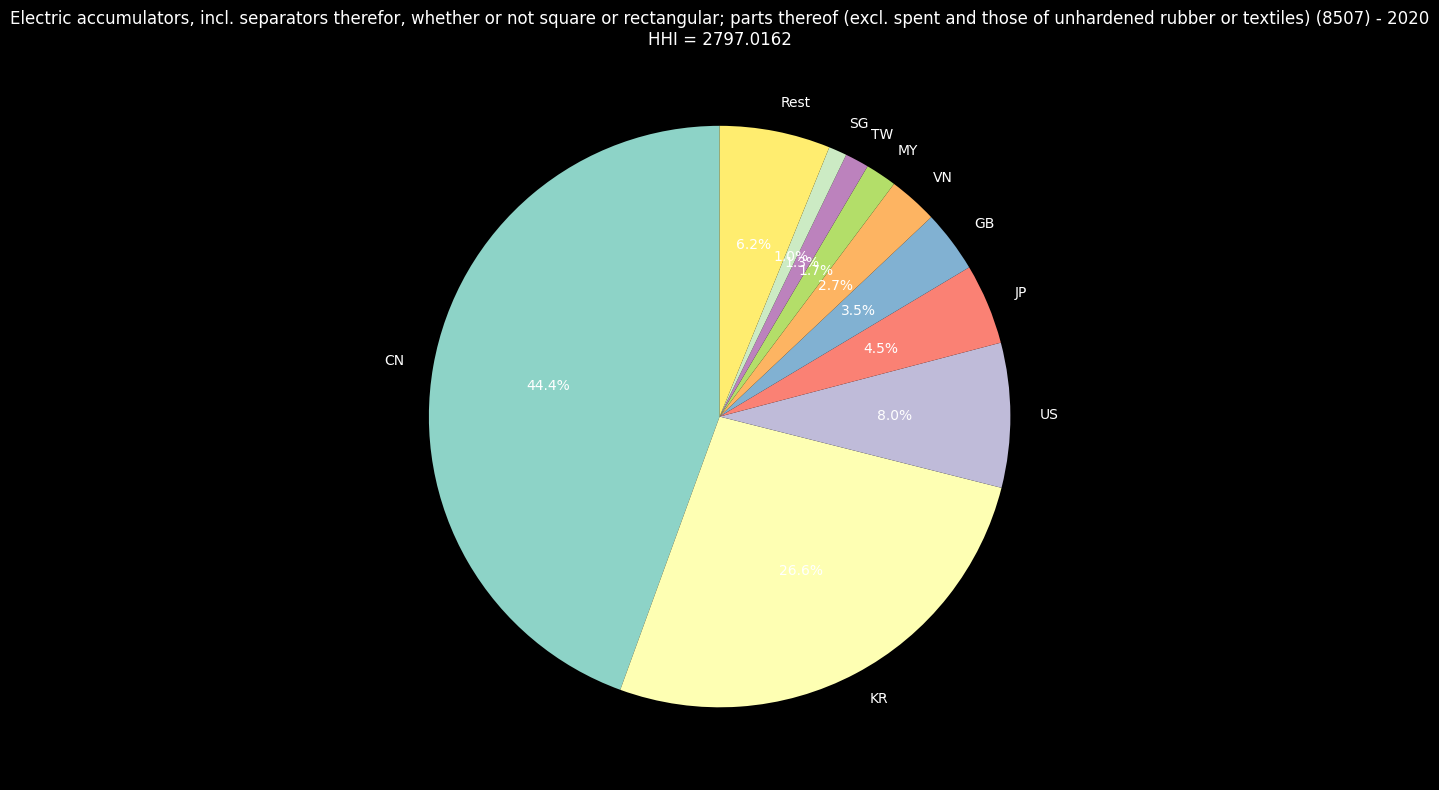

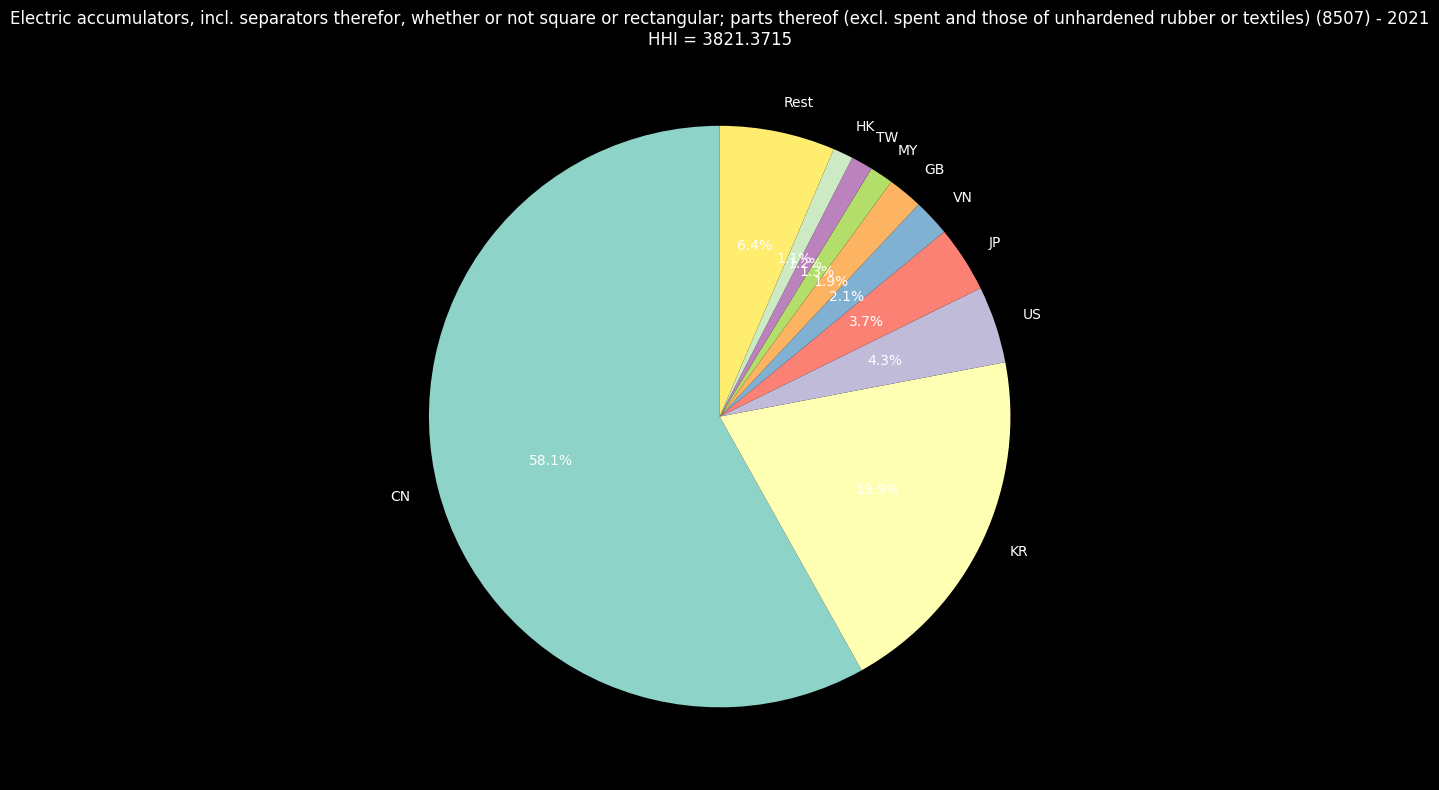

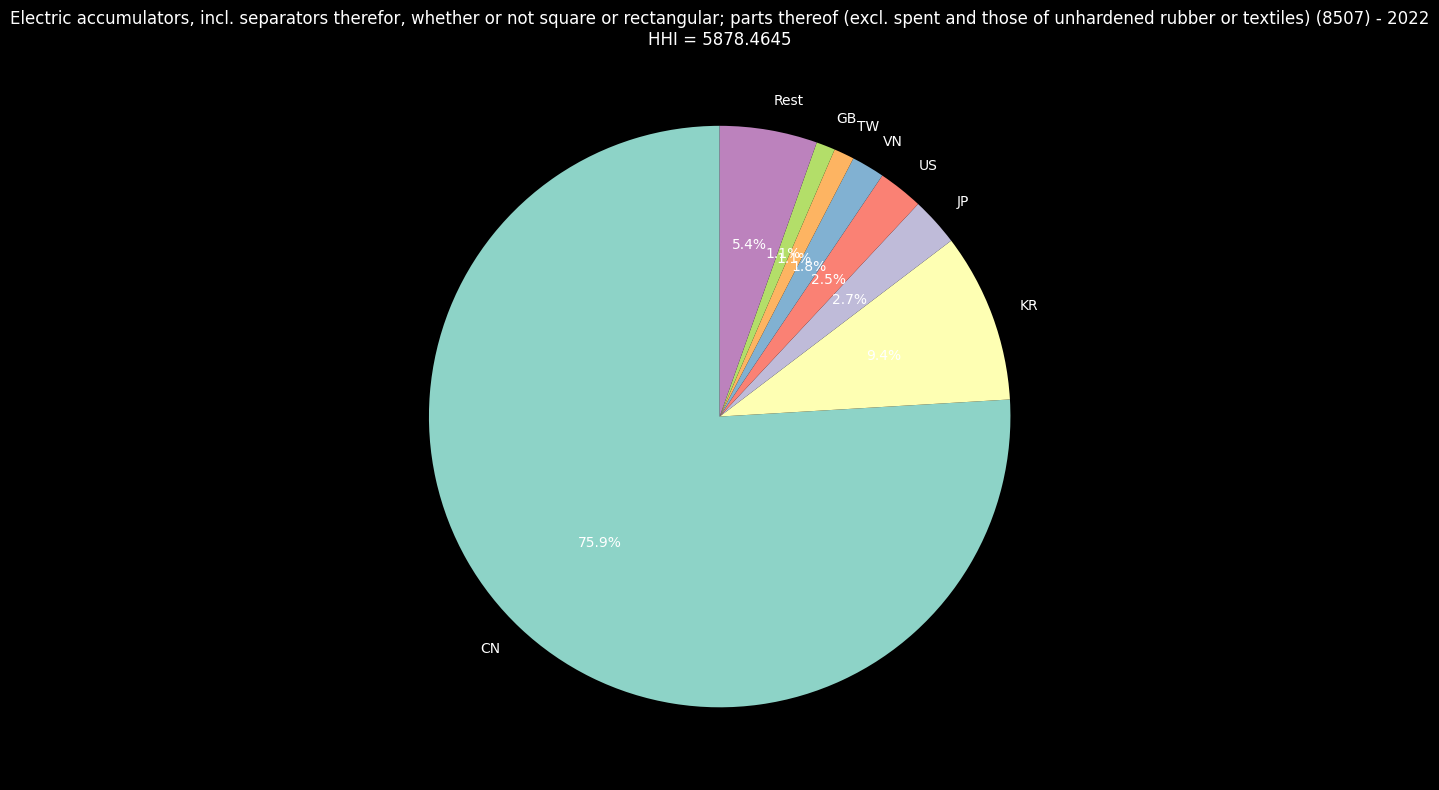

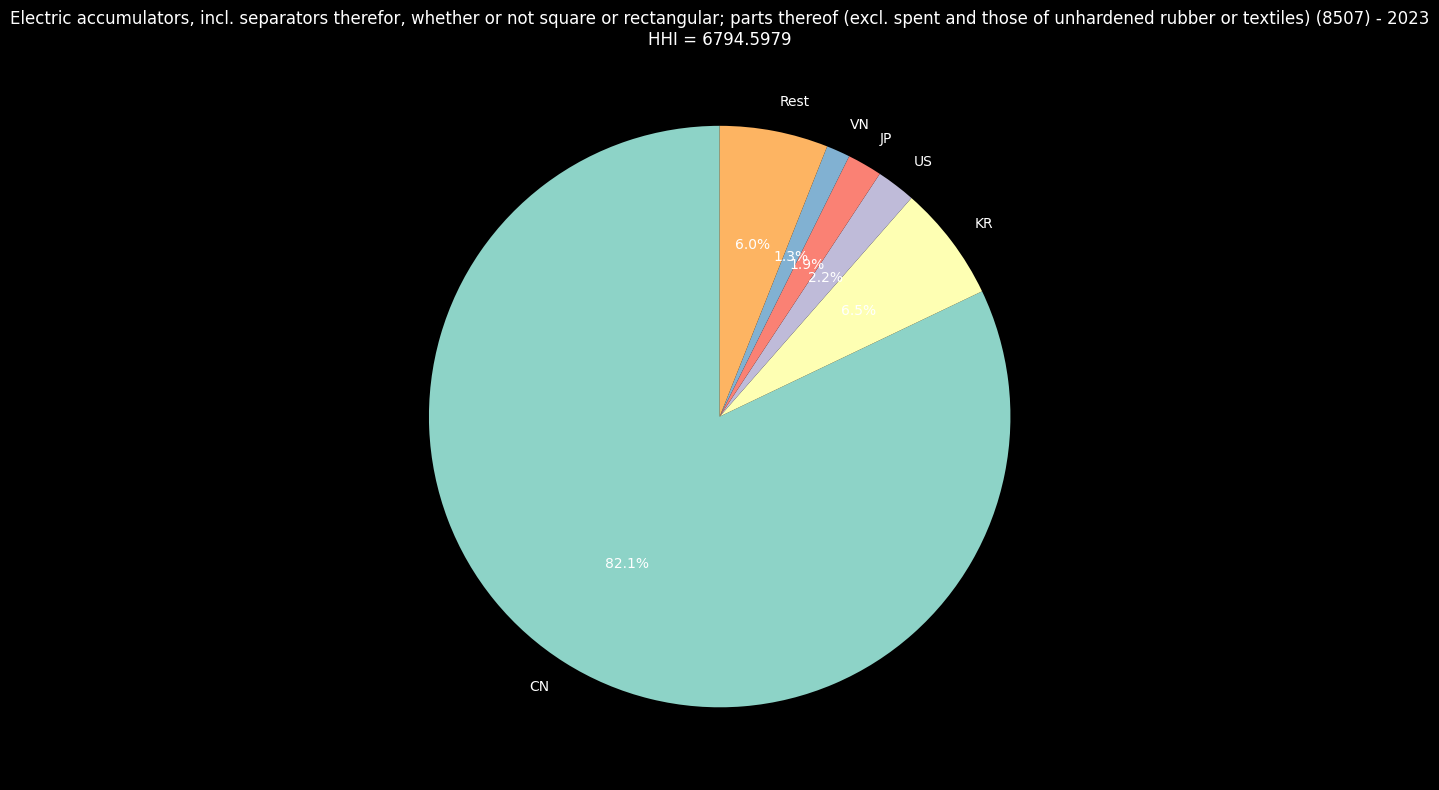

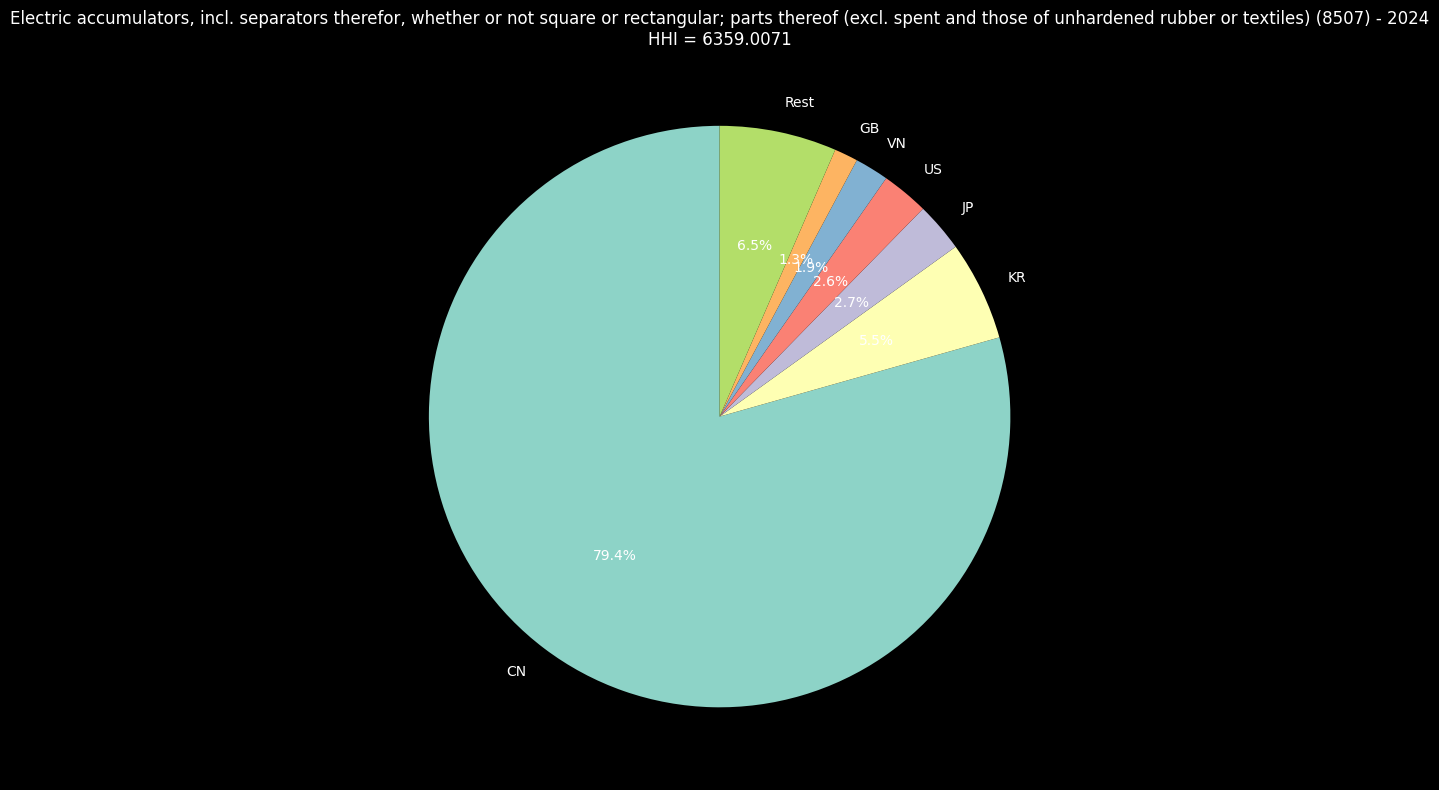

In [6]:
# Pie charts: partner breakdown for a specific product and year
for year in analysis_years:
    plot_pie(result, 8507, year, hhi_df=hhi)

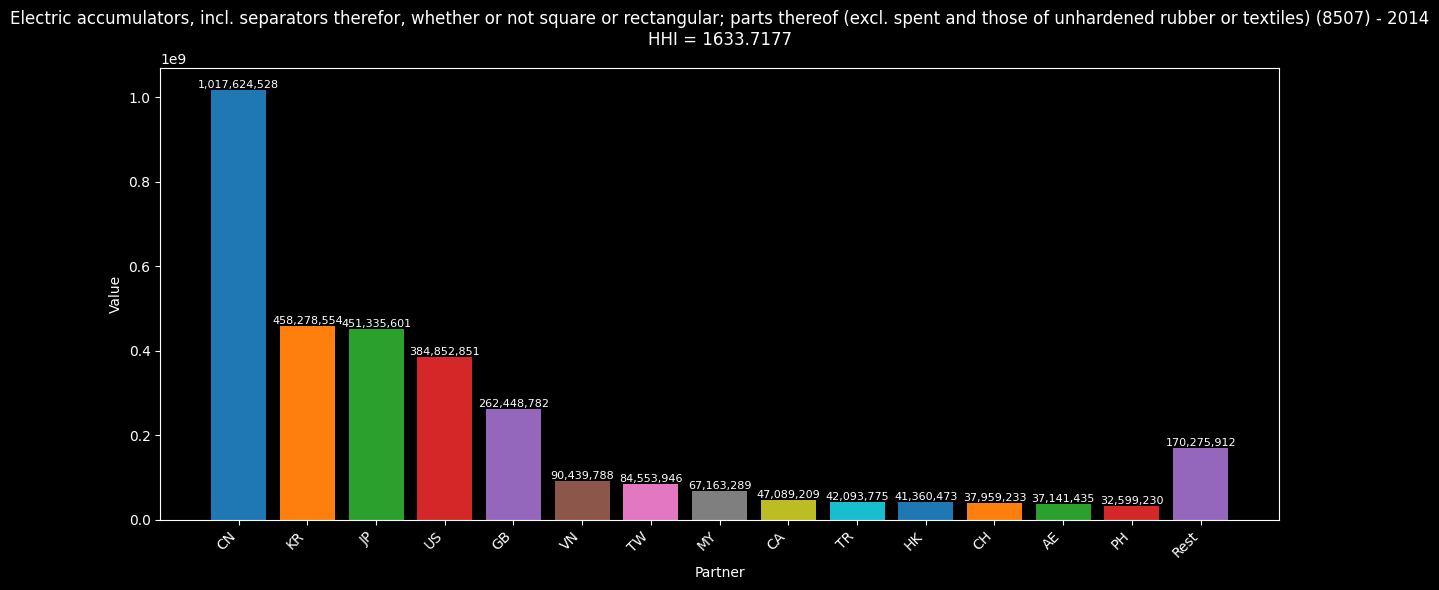

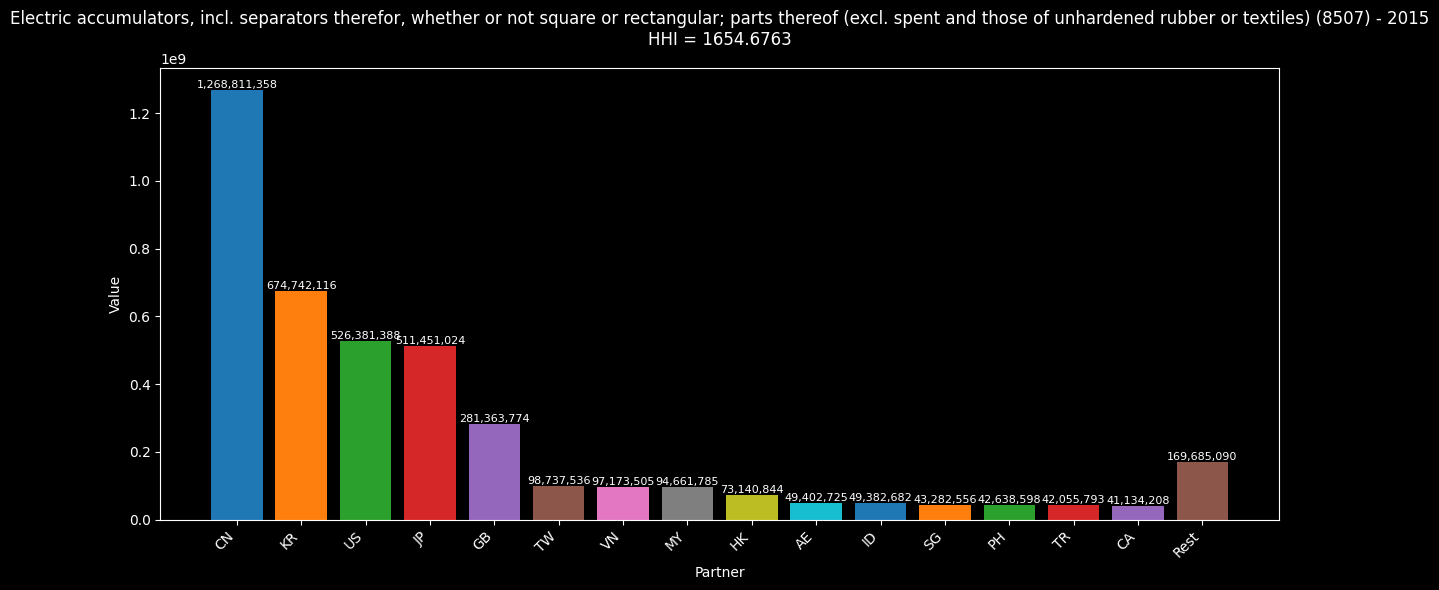

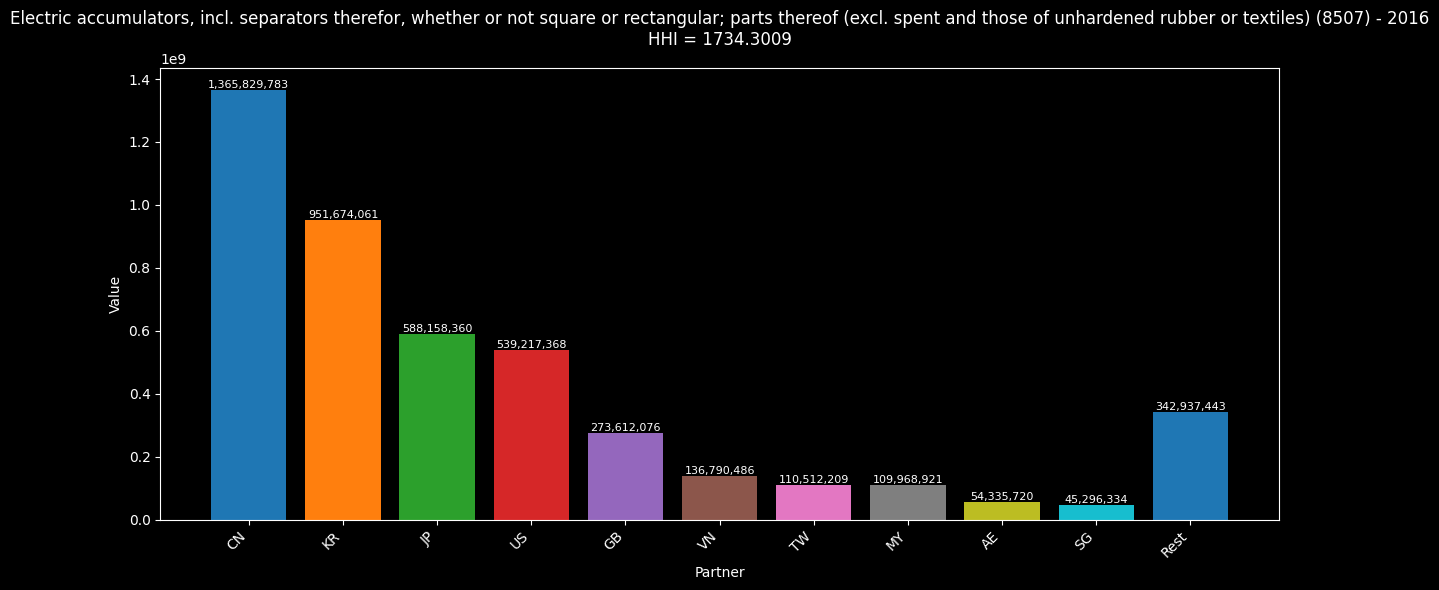

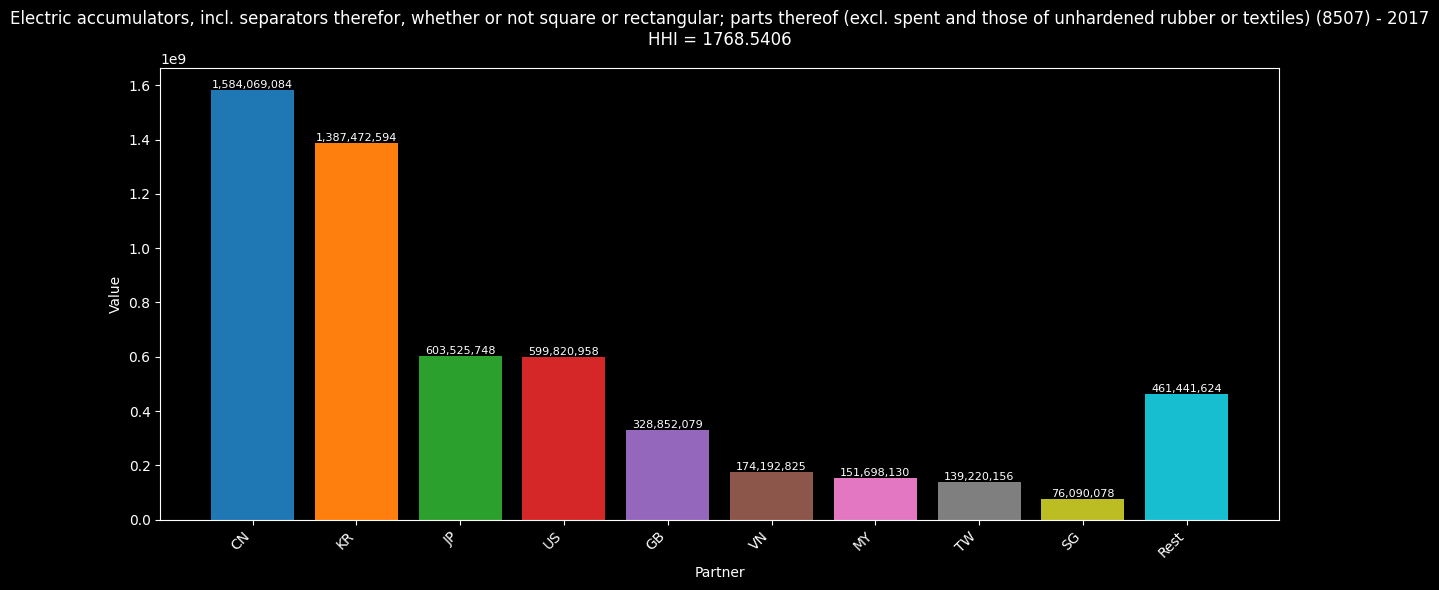

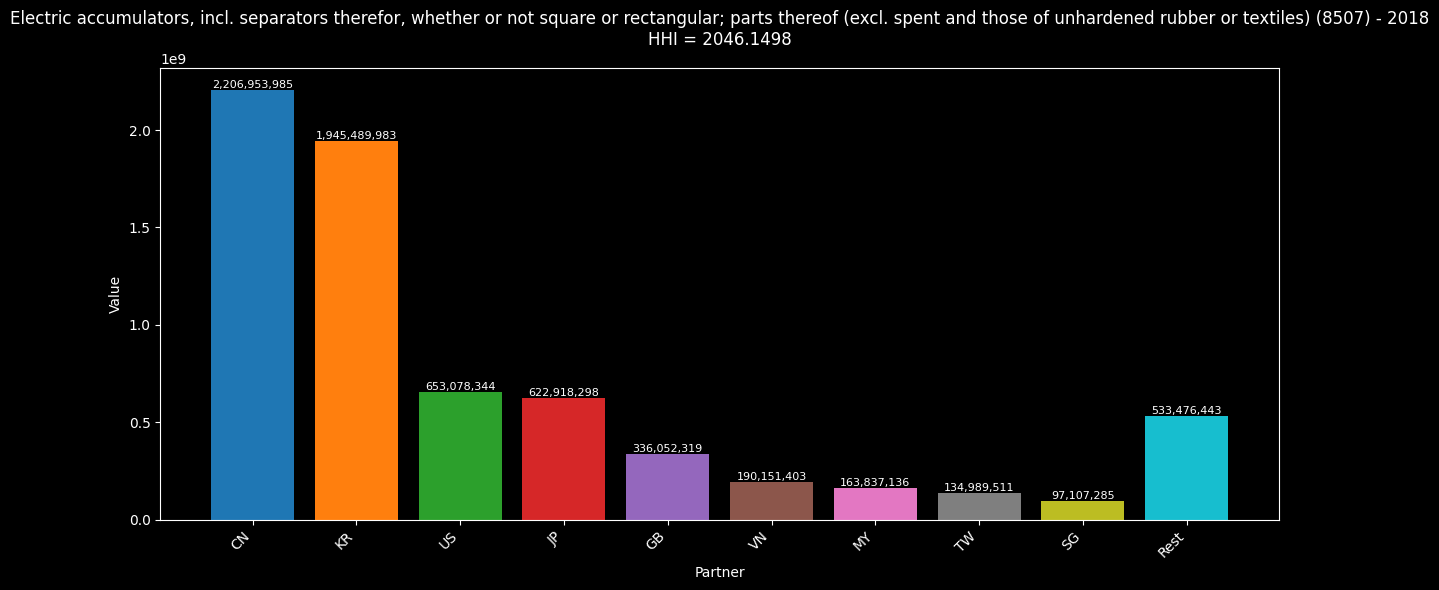

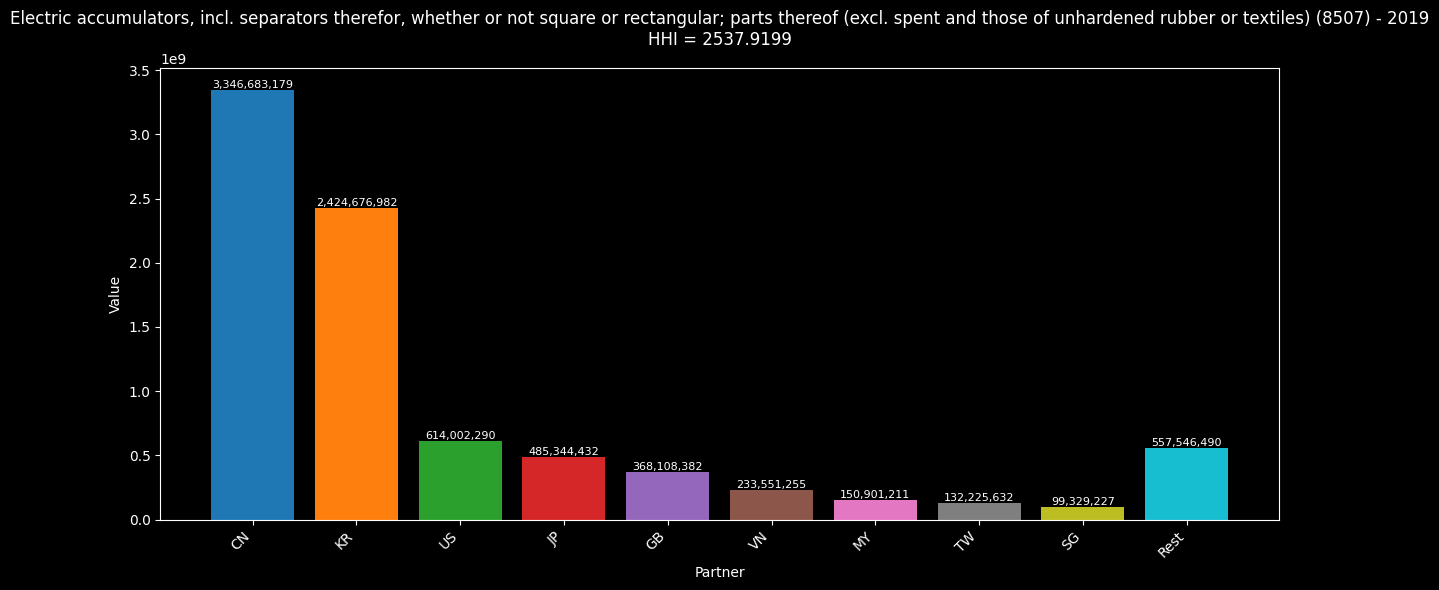

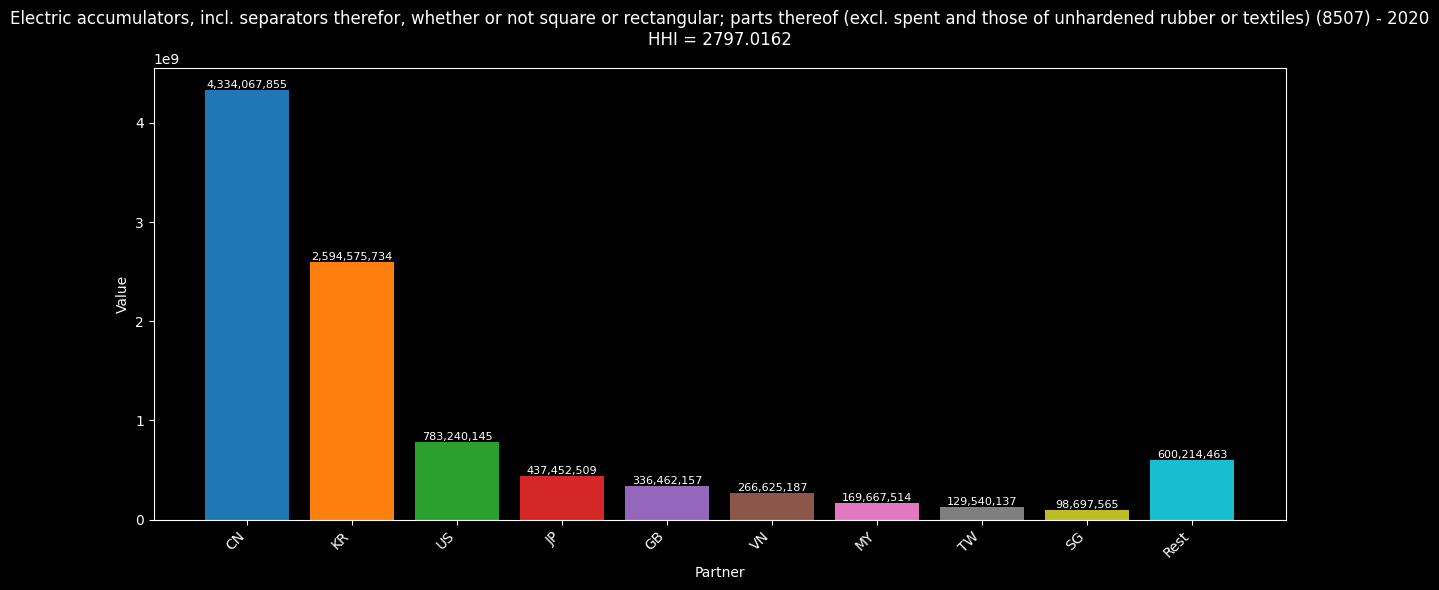

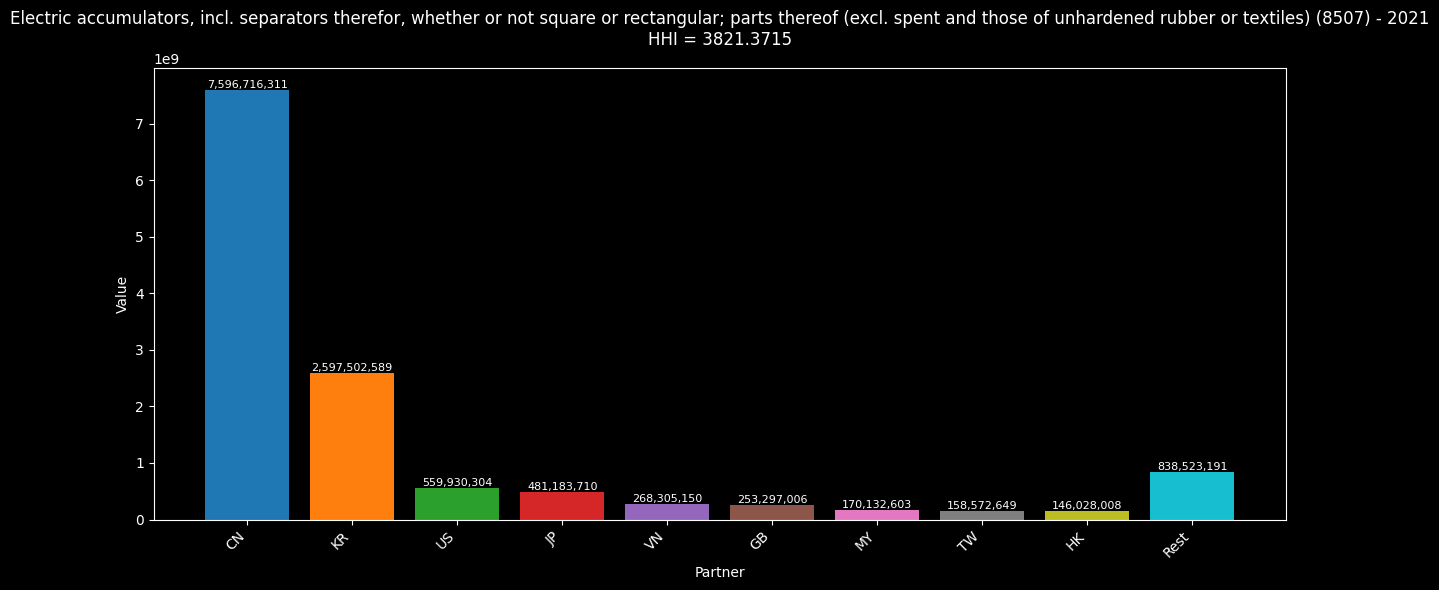

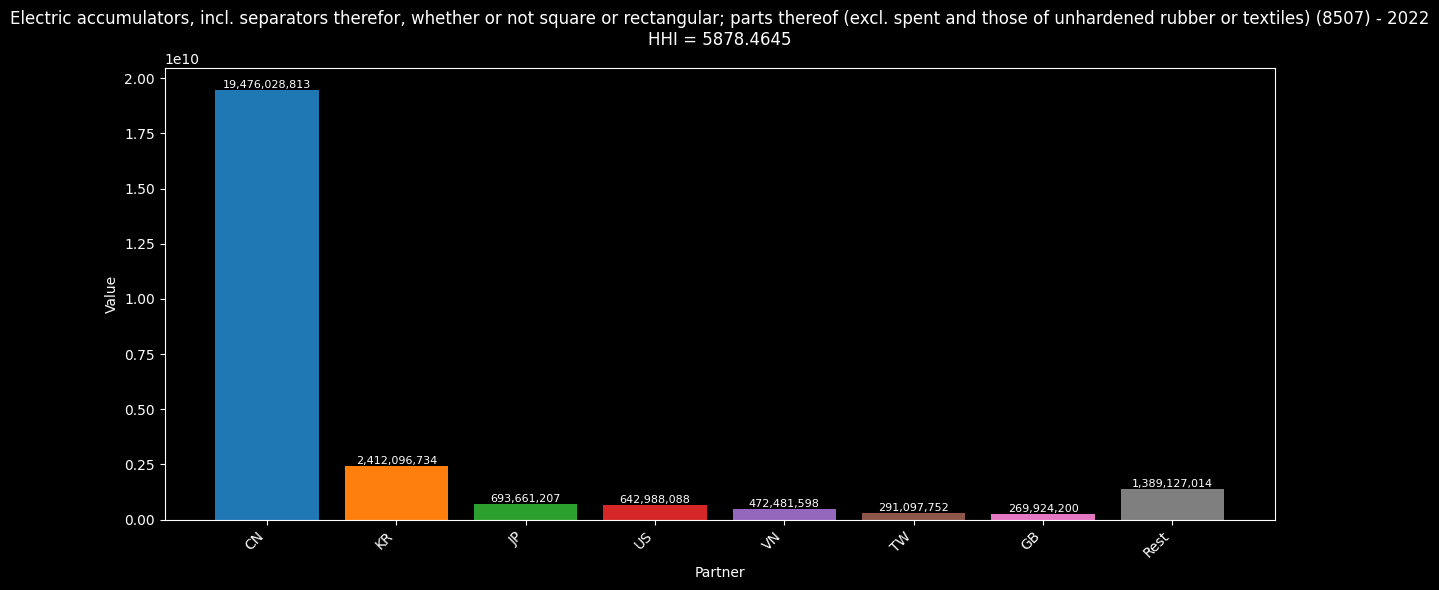

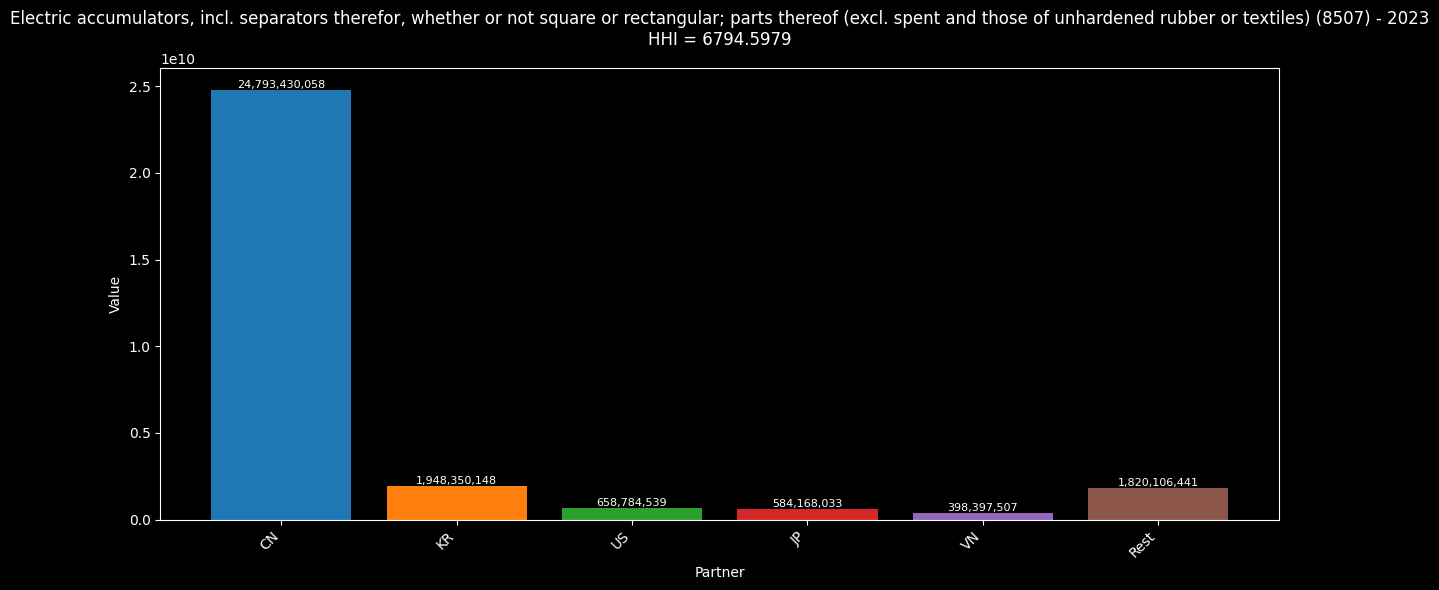

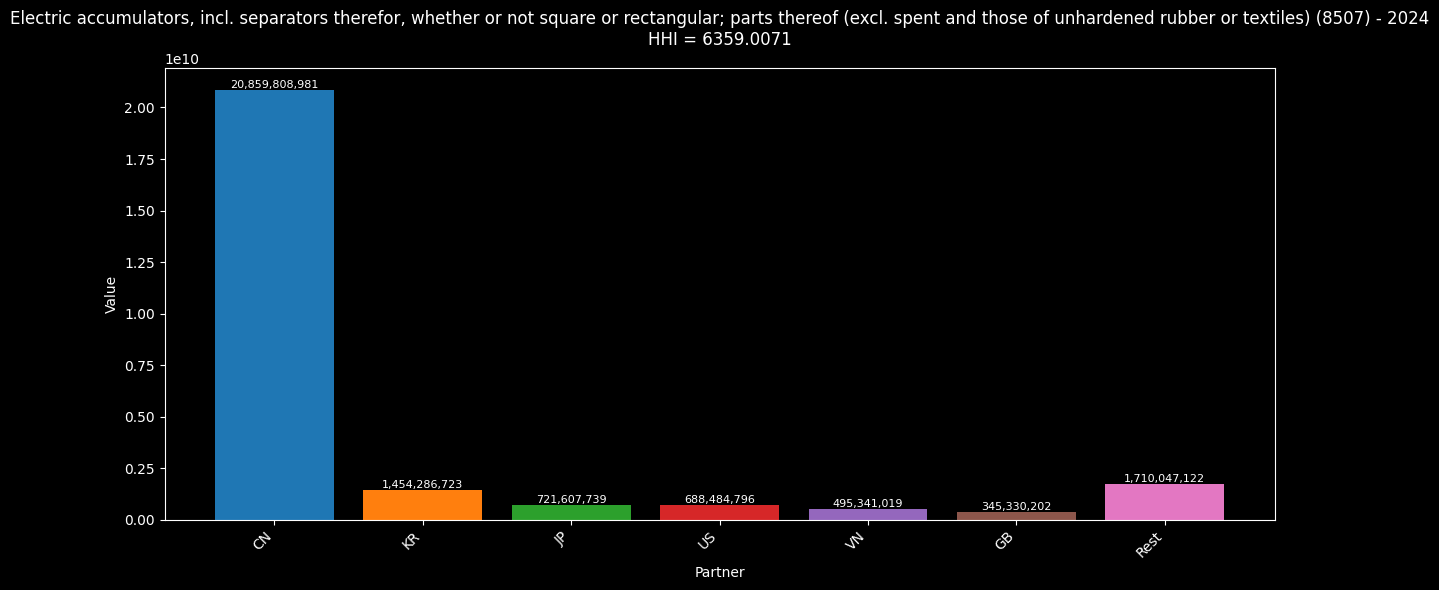

In [7]:
# Bar charts: partner trade values for a specific product and year
for year in analysis_years:
    plot_bar(result, 8507, year, hhi_df=hhi)

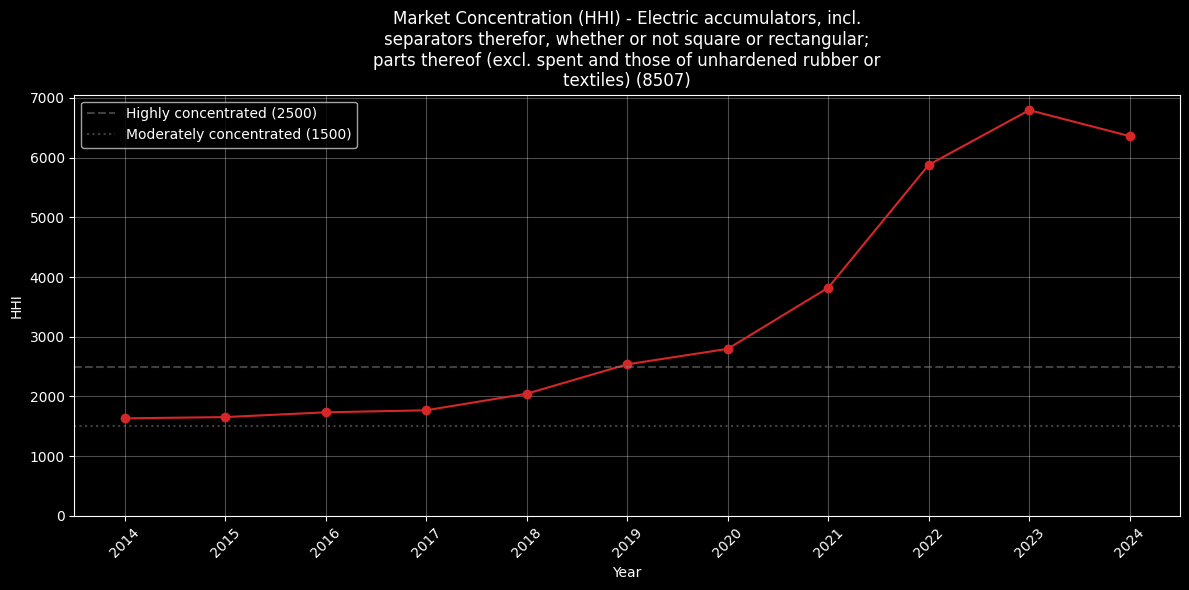

In [9]:
# HHI concentration over time for each product
code = 8507
name = result.filter(pl.col("product_code") == code)["product_name"][0]
plot_hhi_over_time(hhi, code, product_name=name)